# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

## Specifying filetype, and folder as before

In [17]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [18]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [19]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

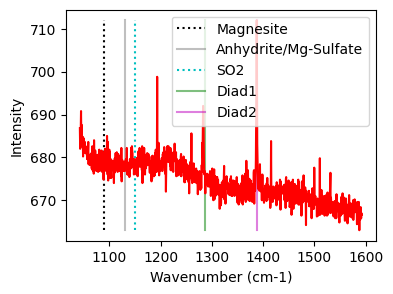

In [20]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [21]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [22]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=15.899993900000027, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1283.070695       1283.070695        0.119147         39.078173   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           1.183582                  0              15.508638   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        1.492186    1.392824e-07    2.367164  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.043243      1.051724                   0.102364   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.152635  PseudoVoigtModel

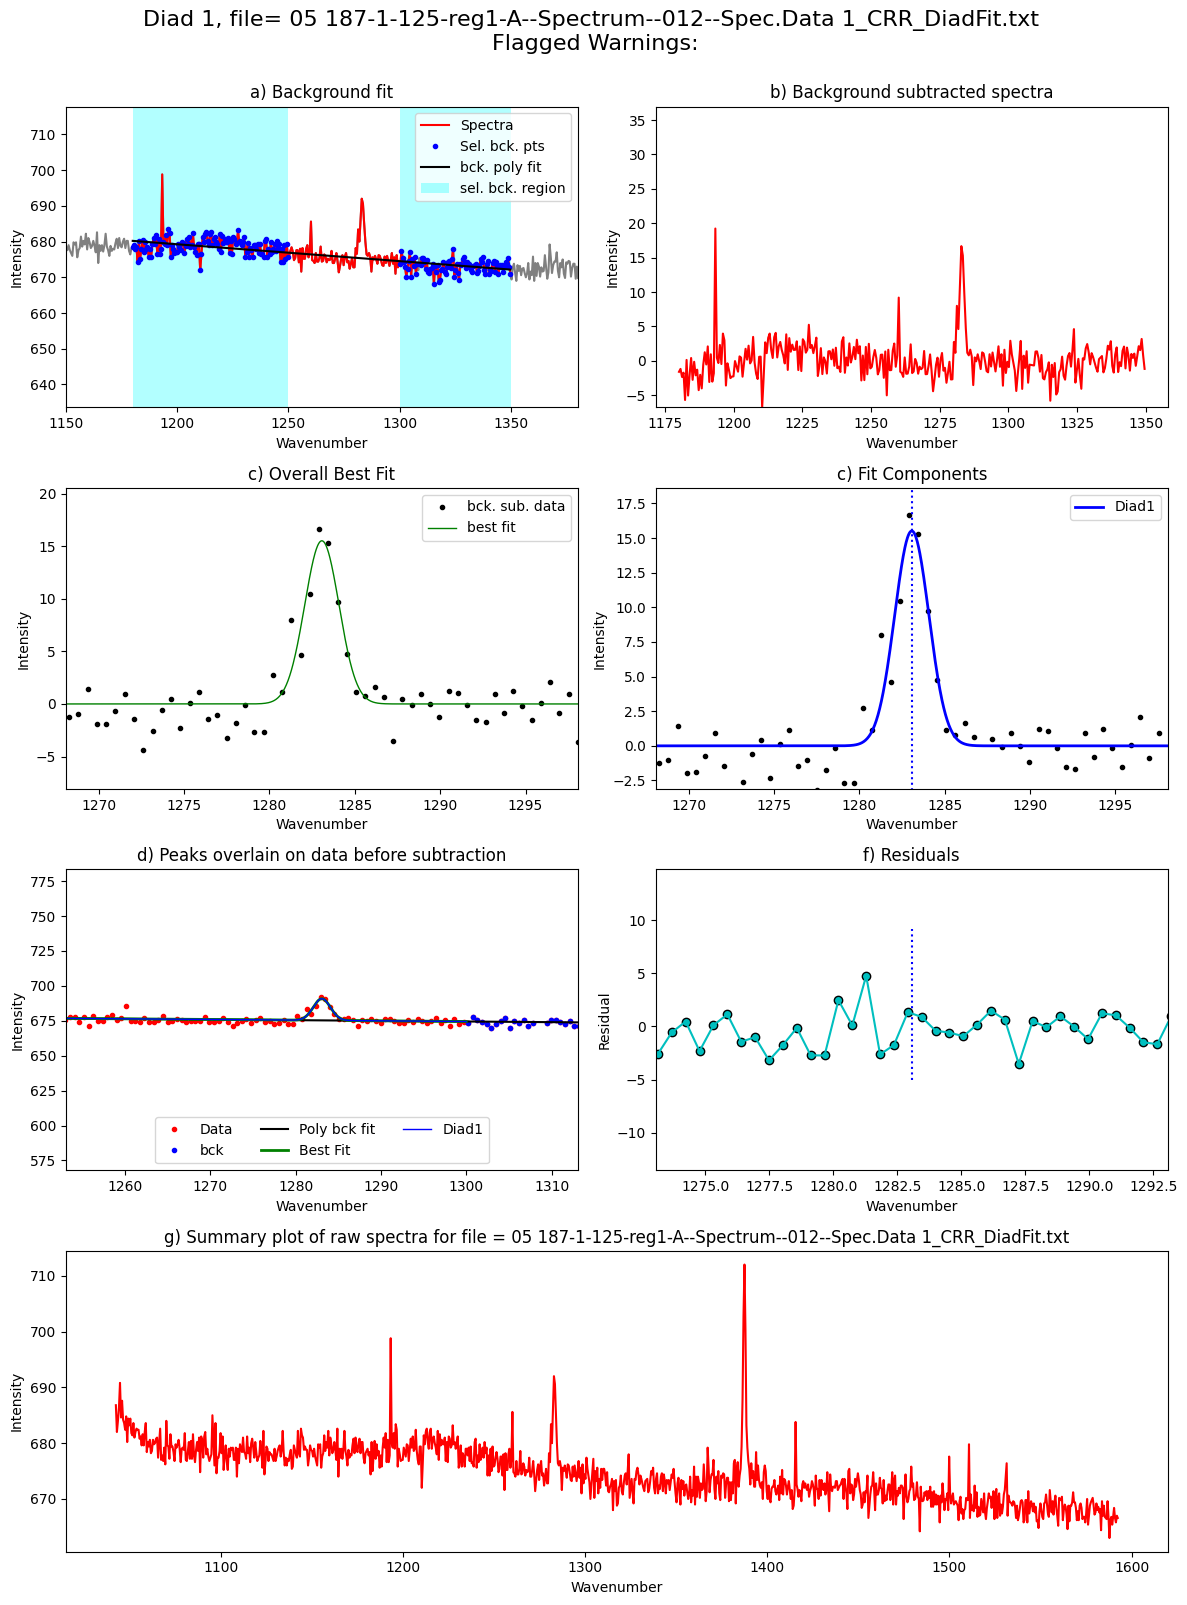

In [23]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [24]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [25]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=39.71657240040338, HB_prom=nan, C13_prom=10, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

below your threshold intensity, we have filled with nans


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.446512       1387.446512        0.035766         93.969121   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.804242                  0              40.348427   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0        1.576937        0.821574    1.608484   

                                   Diad2_refit  Diad2_Asym50  Diad2_Asym70  \
0  Flagged Warnings: Below threshold intensity      1.126362      1.181669   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.203251              0.039865  PseudoVoigtModel

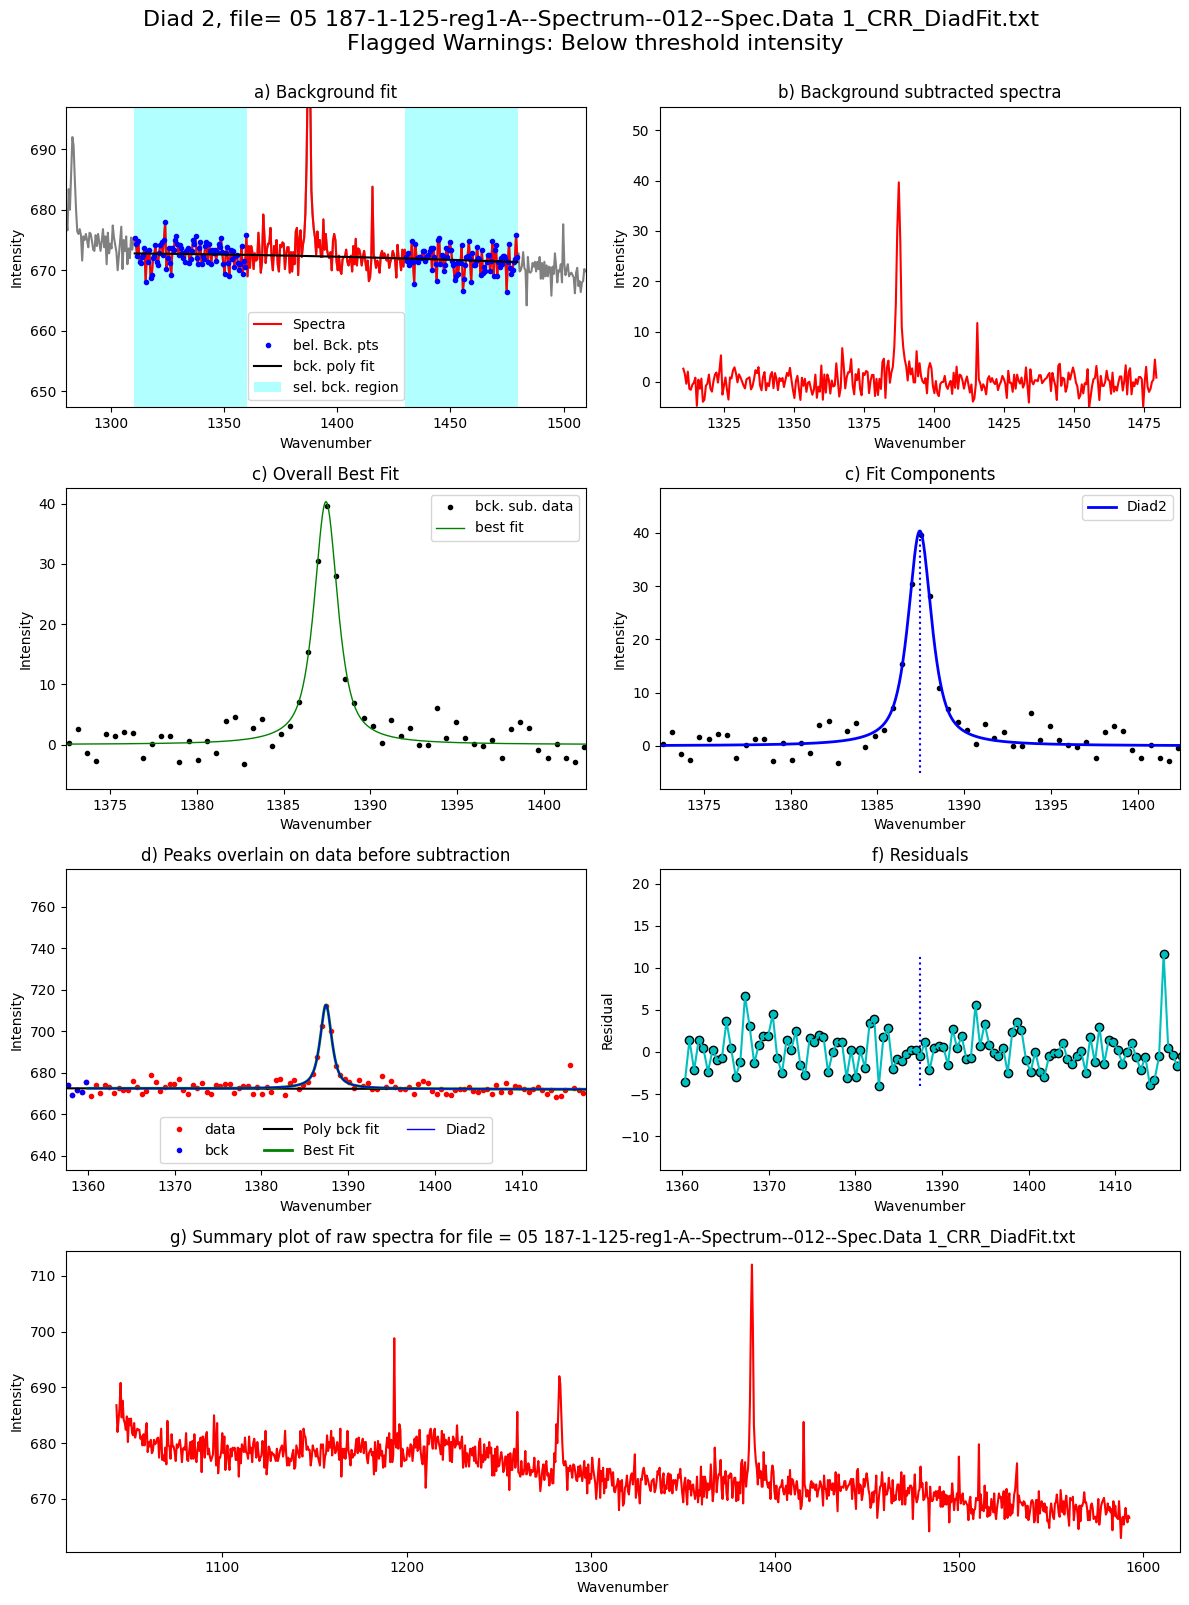

In [26]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/14 [00:00<?, ?it/s]

Processing file: 05 187-1-125-reg1-A--Spectrum--012--Spec.Data 1_CRR_DiadFit.txt
below your threshold intensity, we have filled with nans


  7%|▋         | 1/14 [00:01<00:25,  1.98s/it]

Processing file: 06 187-1-125-reg1-A--Spectrum--014--Spec.Data 1.txt


 14%|█▍        | 2/14 [00:04<00:24,  2.07s/it]

Processing file: 07 187-1-125-reg1-A--Spectrum--015--Spec.Data 1_CRR_DiadFit.txt


 21%|██▏       | 3/14 [00:06<00:22,  2.07s/it]

Processing file: 08 187-1-125-reg1-B--Spectrum--017--Spec.Data 1_CRR_DiadFit.txt


 29%|██▊       | 4/14 [00:08<00:22,  2.25s/it]

Processing file: 09 187-1-125-reg2-A--Spectrum--021--Spec.Data 1.txt


 36%|███▌      | 5/14 [00:11<00:21,  2.34s/it]

Processing file: 10 187-1-125-reg2-B--Spectrum--023--Spec.Data 1.txt


 43%|████▎     | 6/14 [00:13<00:19,  2.44s/it]

Processing file: 11 187-1-125-reg2-C--Spectrum--025--Spec.Data 1.txt


 50%|█████     | 7/14 [00:15<00:16,  2.33s/it]

Processing file: 12 187-1-125-reg2-D--Spectrum--027--Spec.Data 1.txt


 57%|█████▋    | 8/14 [00:18<00:14,  2.41s/it]

Processing file: 14 187-1-126-reg1-A--Spectrum--036--Spec.Data 1.txt


 64%|██████▍   | 9/14 [00:21<00:12,  2.44s/it]

Processing file: 15 187-1-126-reg2-A--Spectrum--038--Spec.Data 1.txt


 71%|███████▏  | 10/14 [00:23<00:09,  2.37s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 16 187-1-126-reg2-B--Spectrum--040--Spec.Data 1.txt


 79%|███████▊  | 11/14 [00:25<00:07,  2.38s/it]

Processing file: 17 187-1-126-reg3-A--Spectrum--042--Spec.Data 1.txt


 86%|████████▌ | 12/14 [00:27<00:04,  2.32s/it]

Processing file: 18 187-1-126-reg3-B--Spectrum--044--Spec.Data 1.txt


 93%|█████████▎| 13/14 [00:29<00:02,  2.23s/it]

Processing file: 19 187-1-126-reg3-C--Spectrum--046--Spec.Data 1.txt


100%|██████████| 14/14 [00:32<00:00,  2.29s/it]


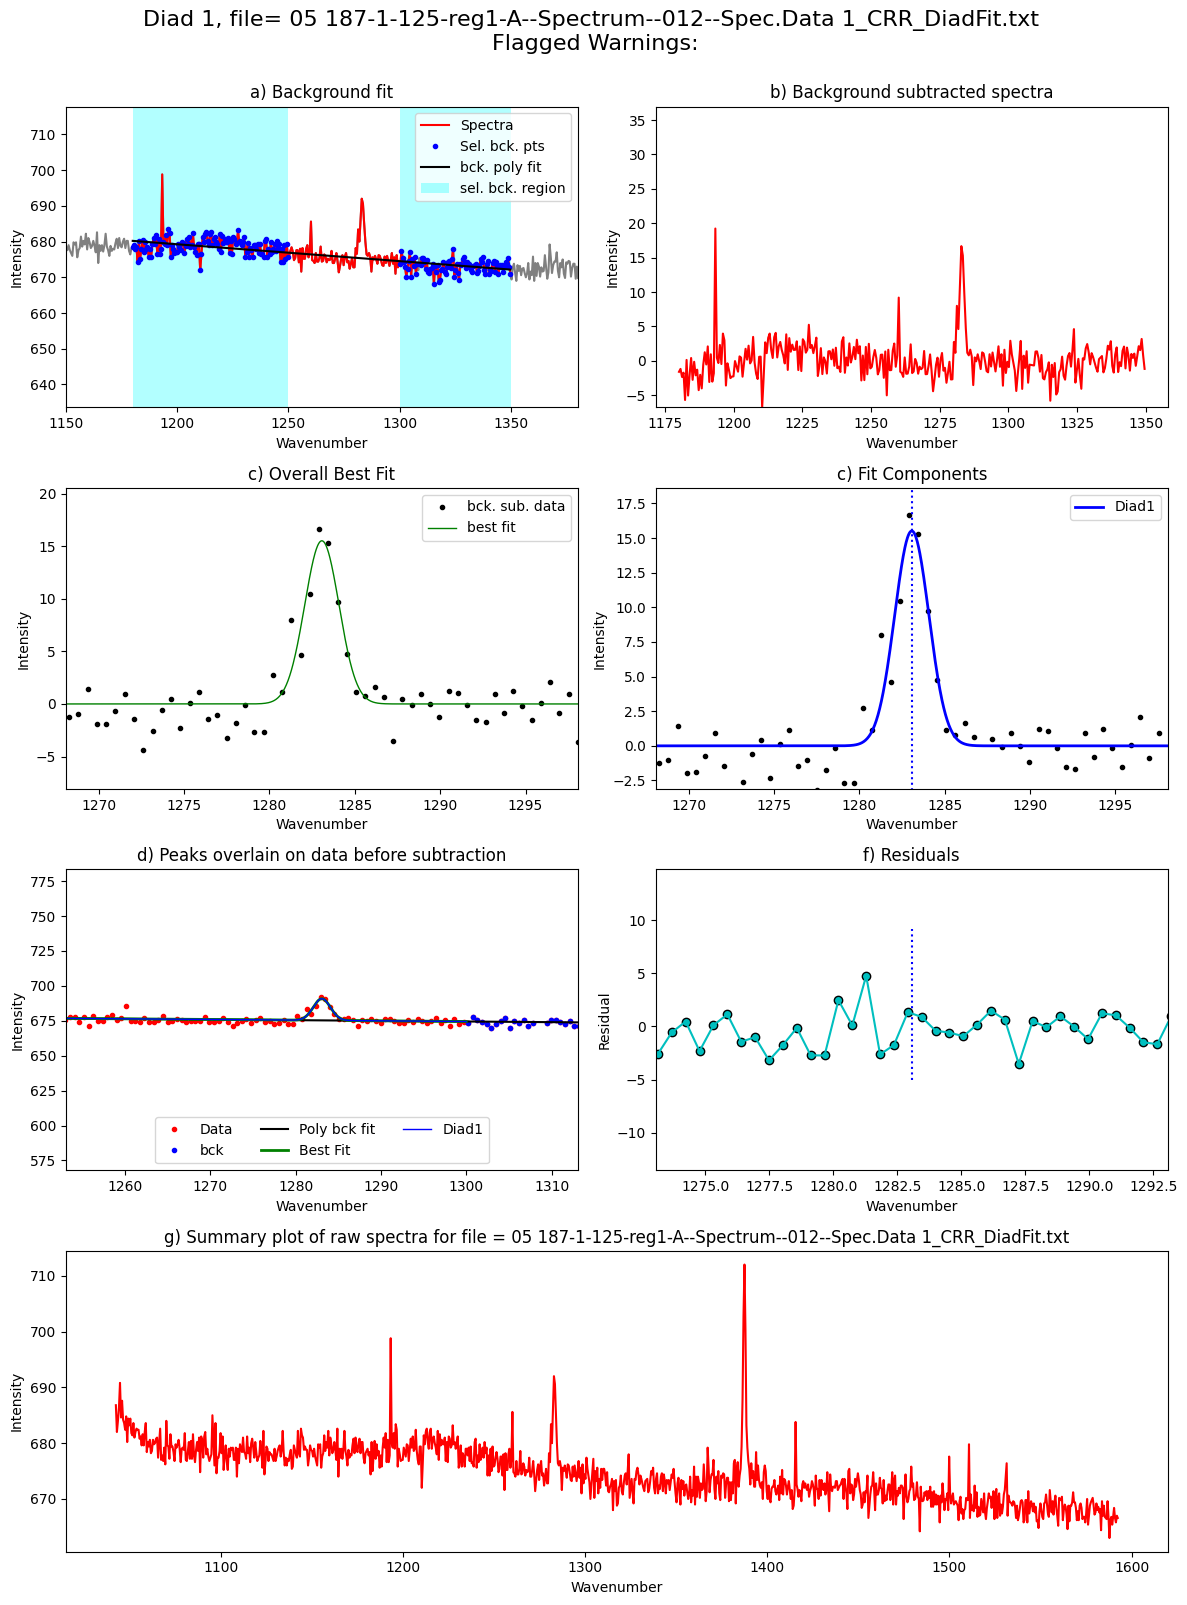

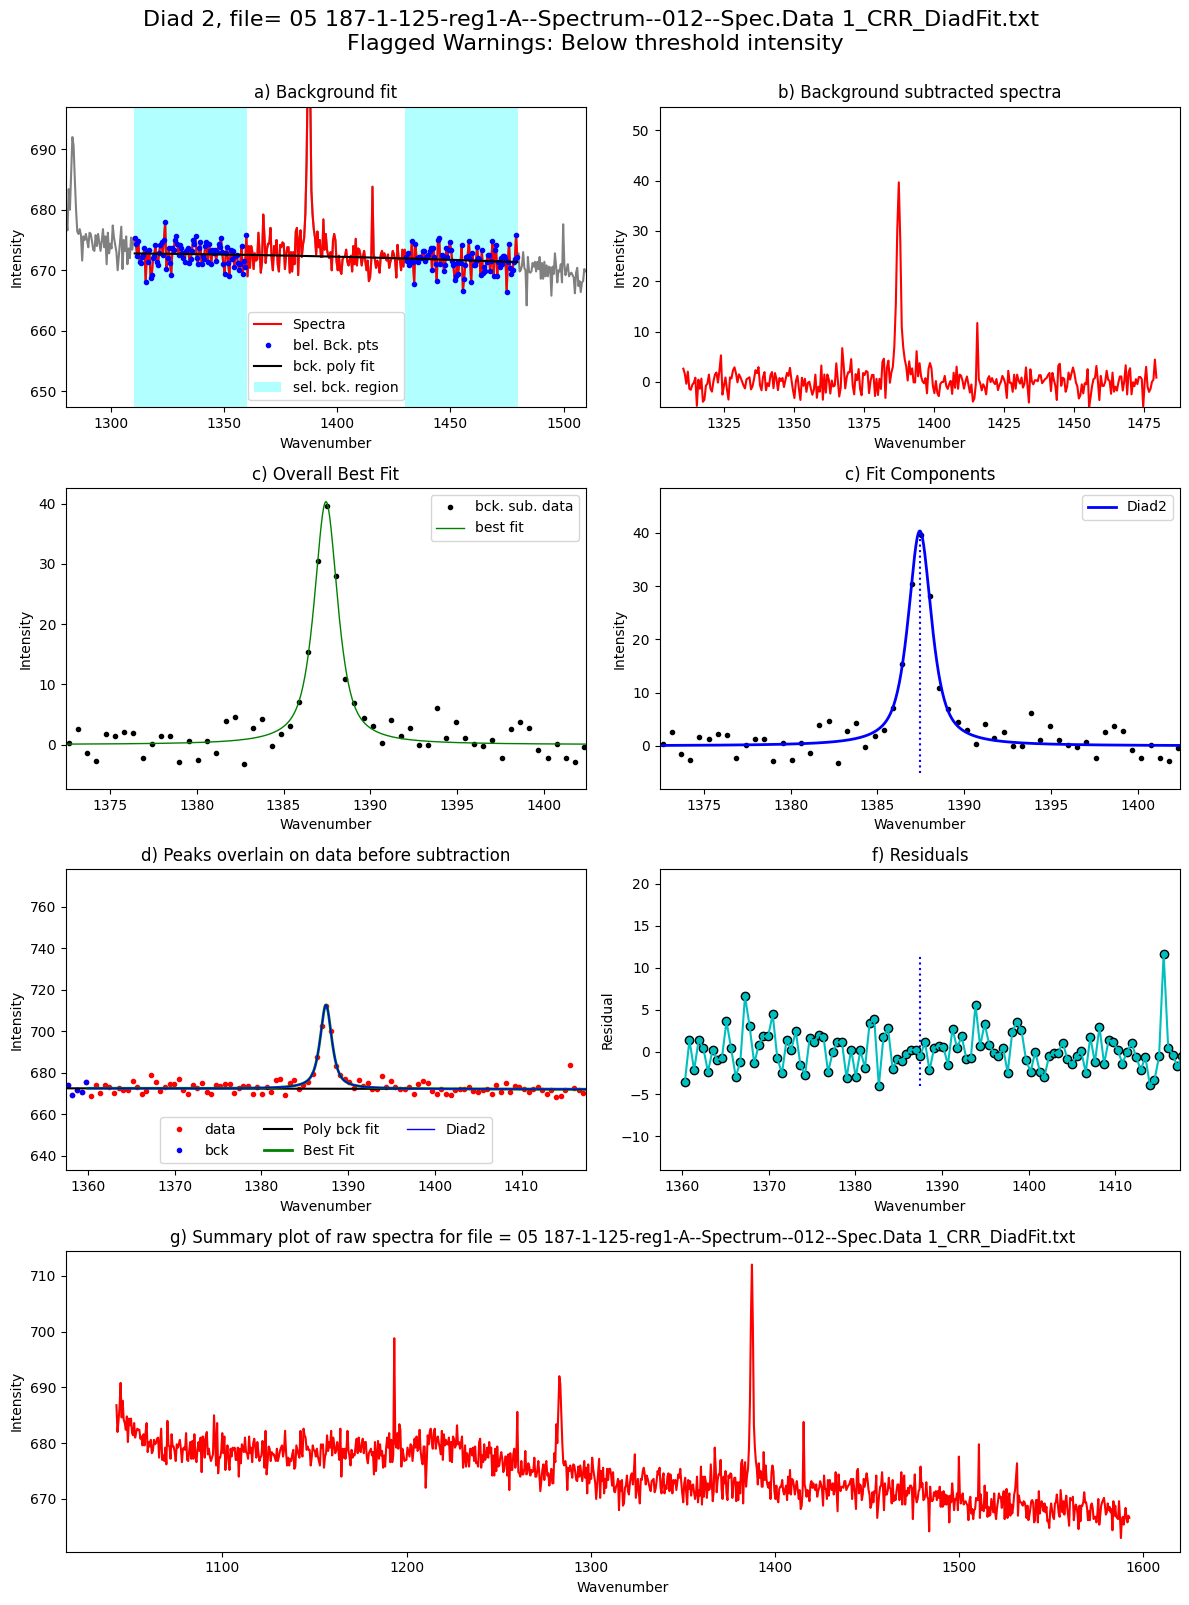

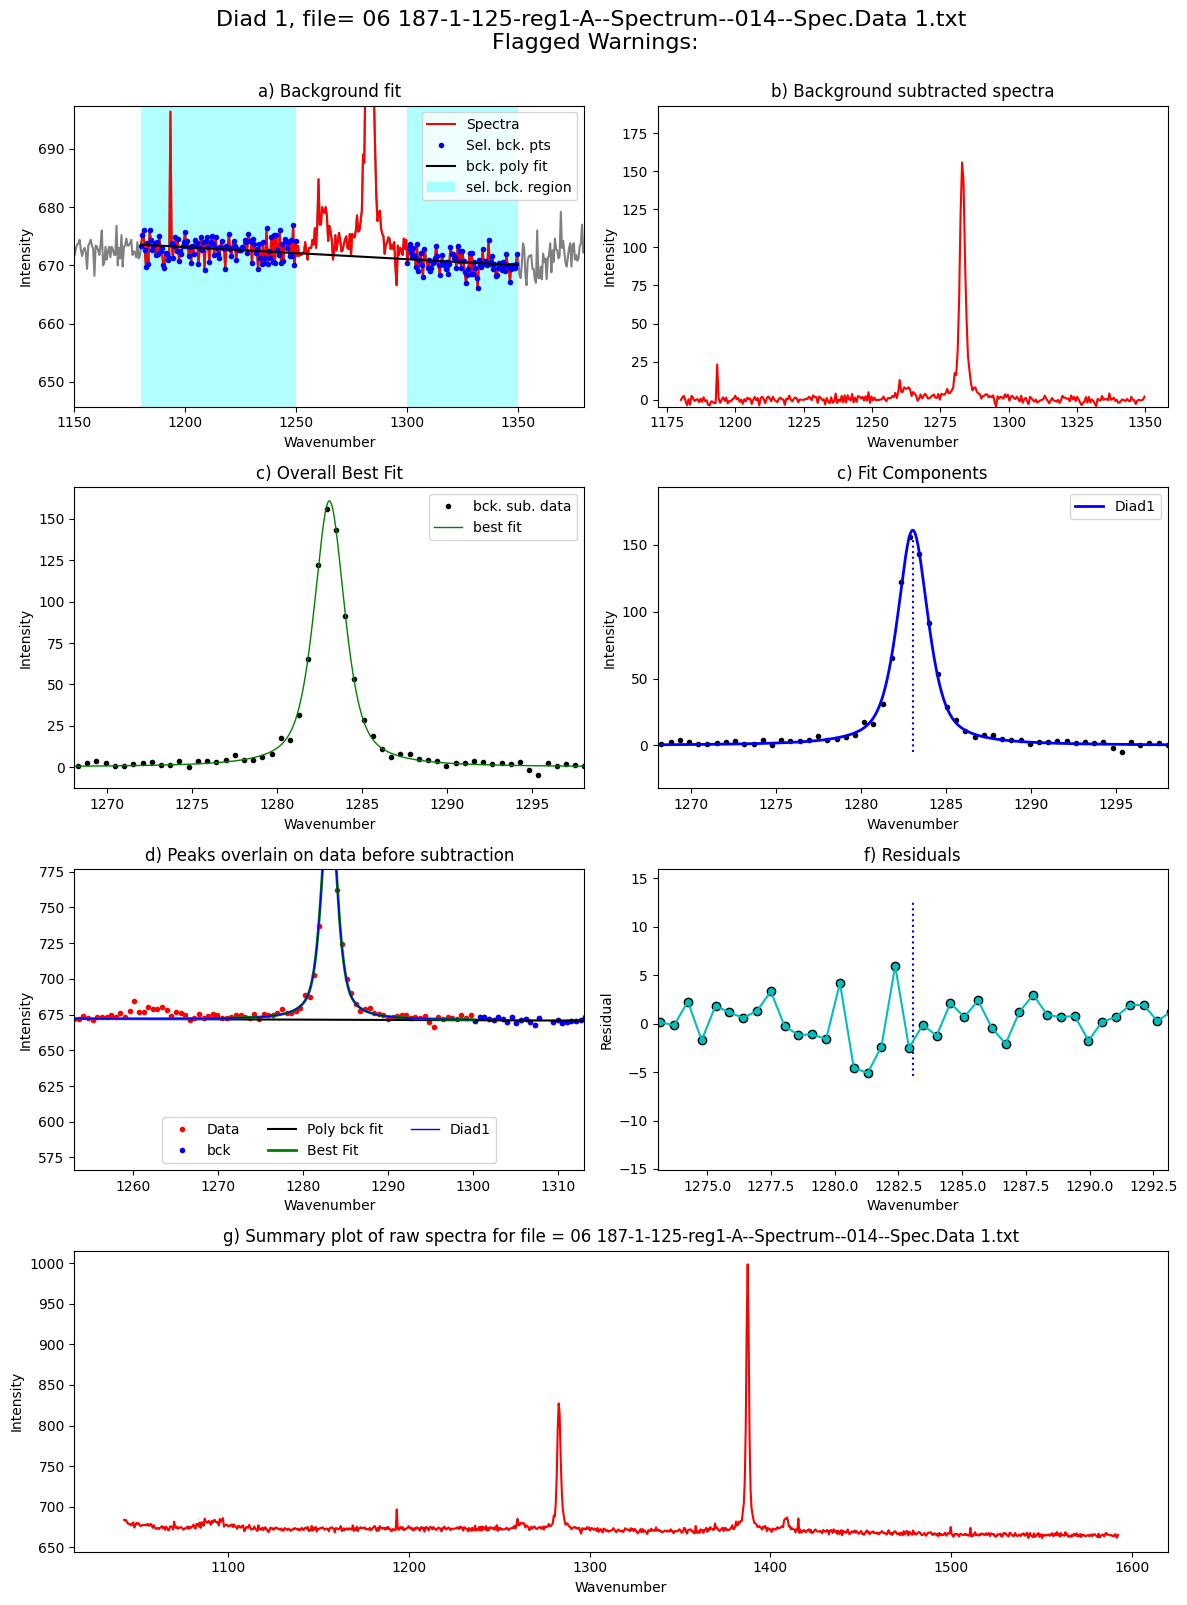

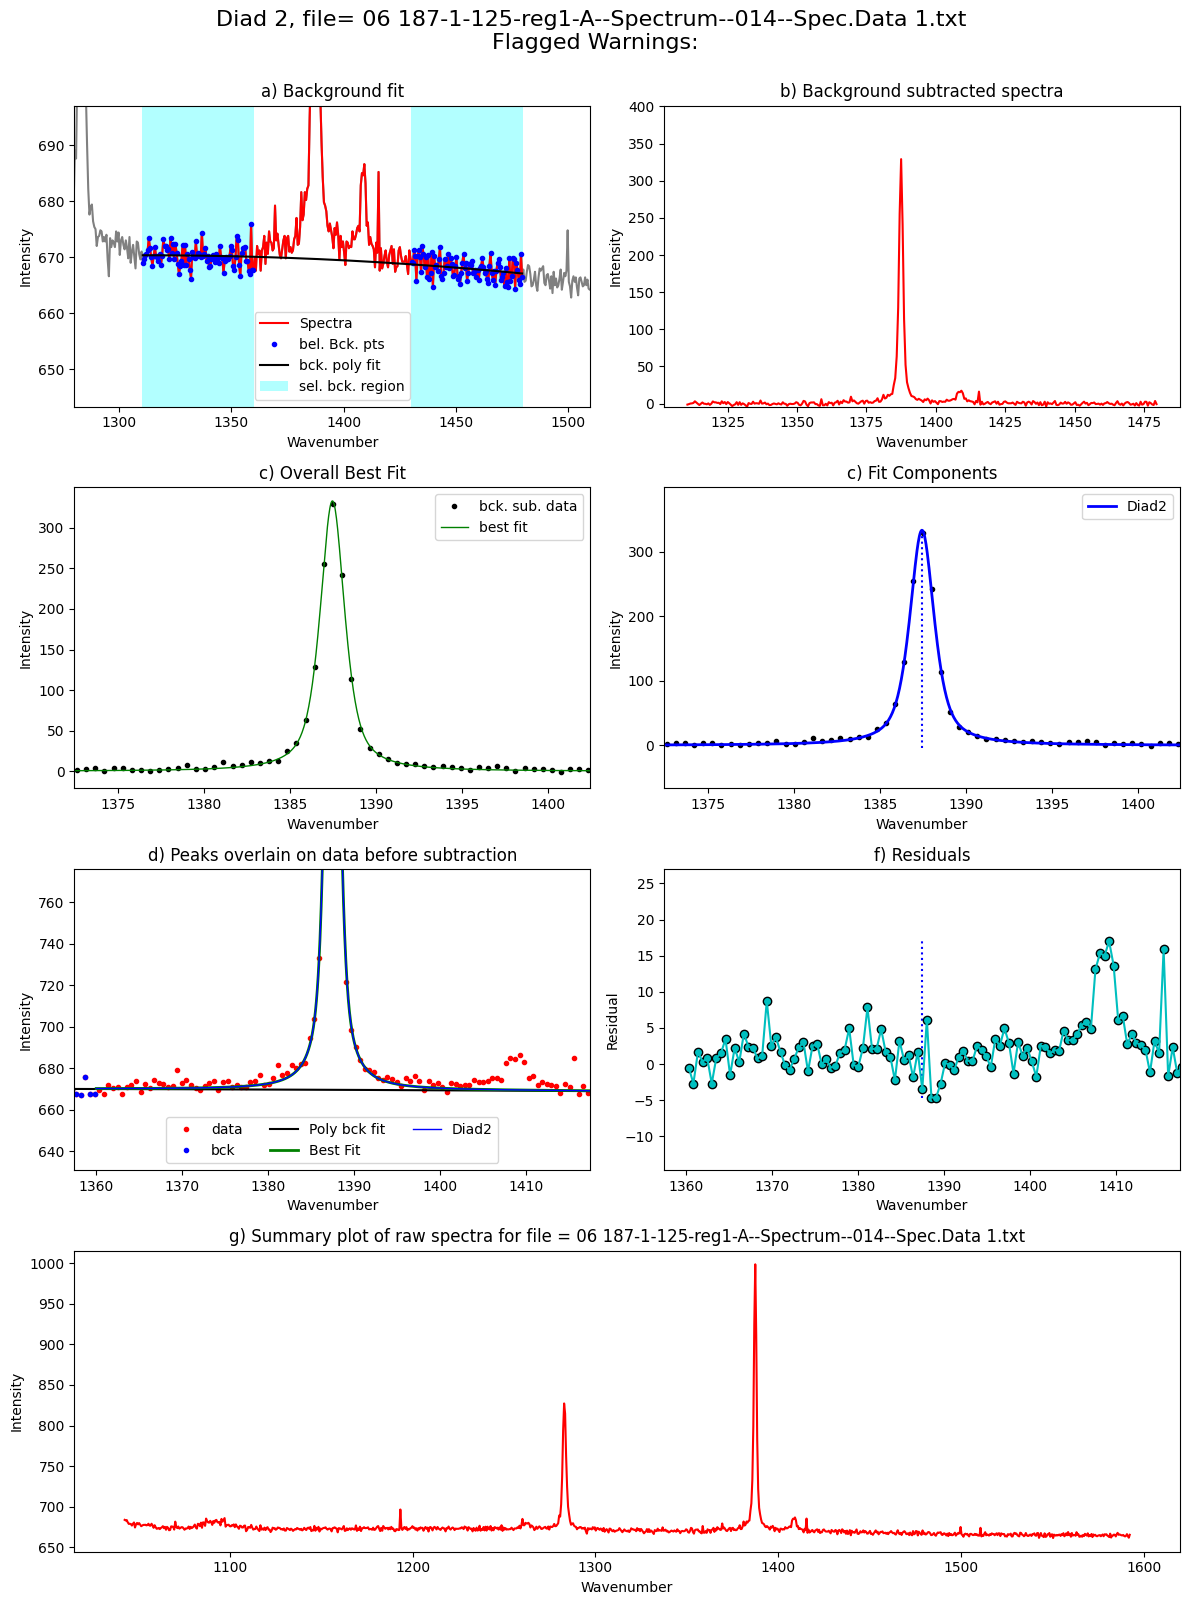

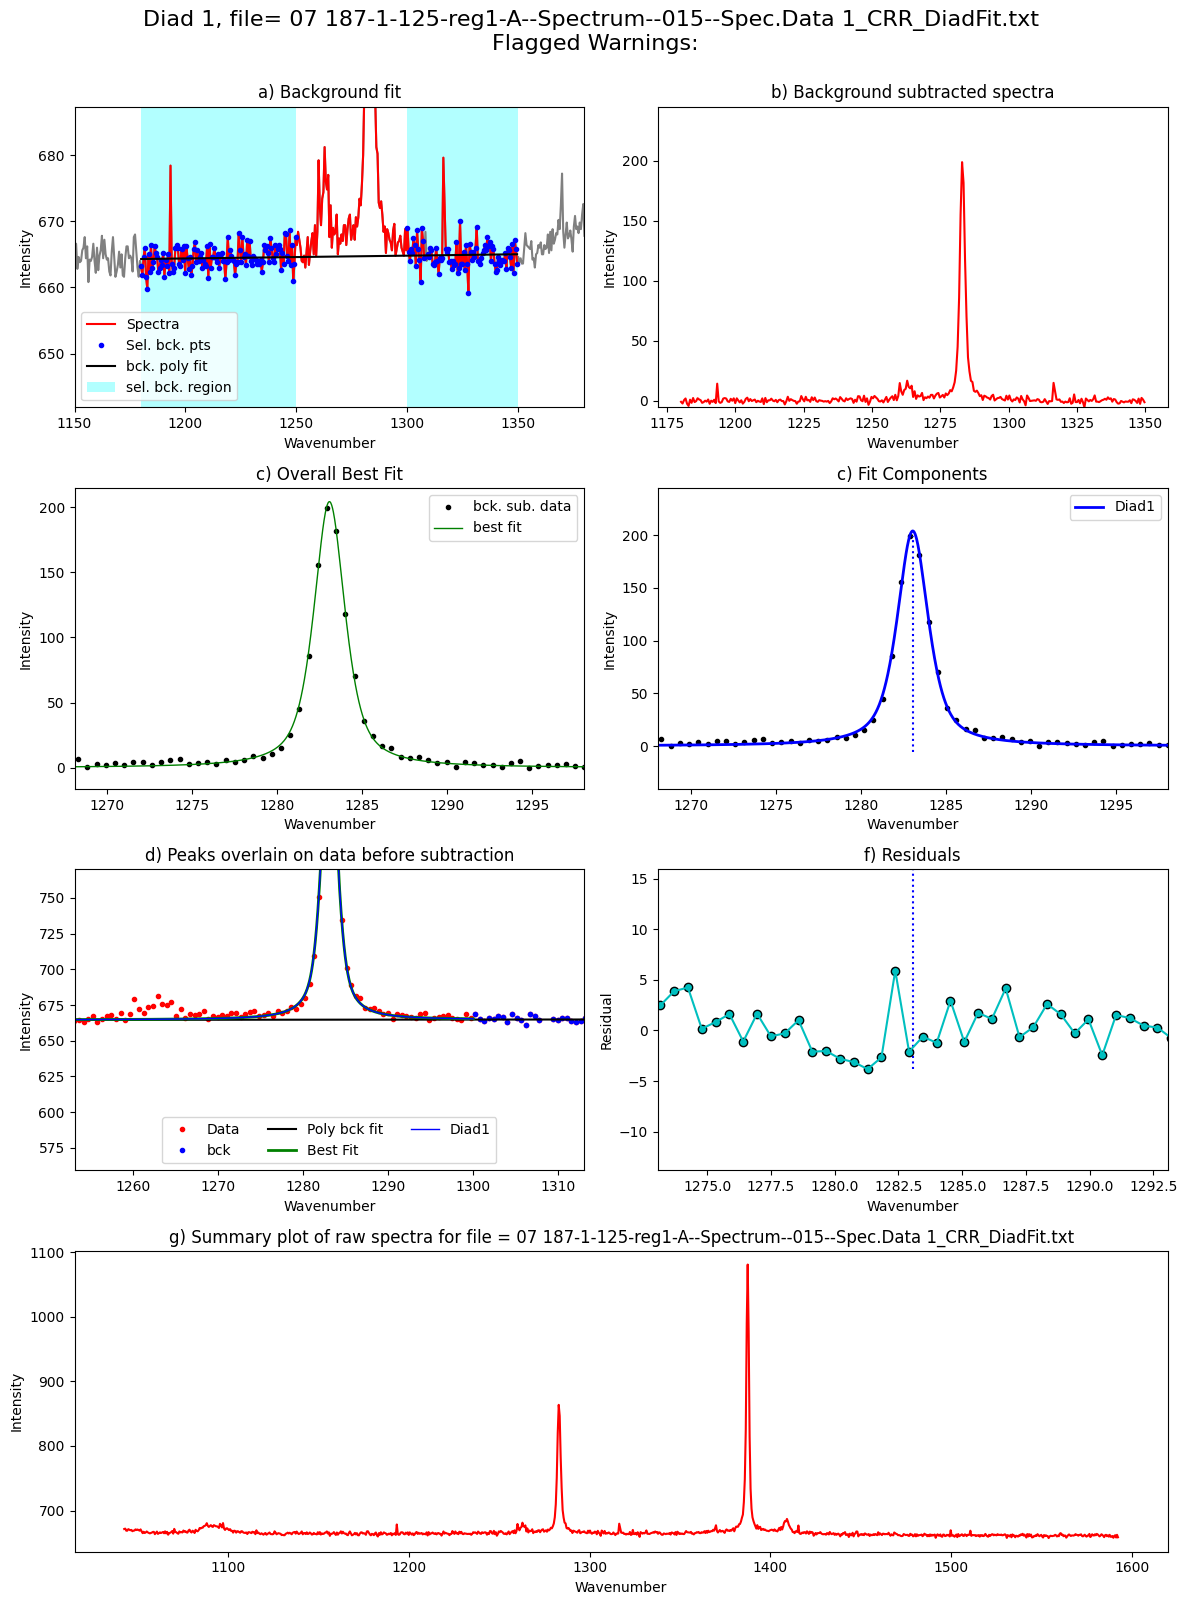

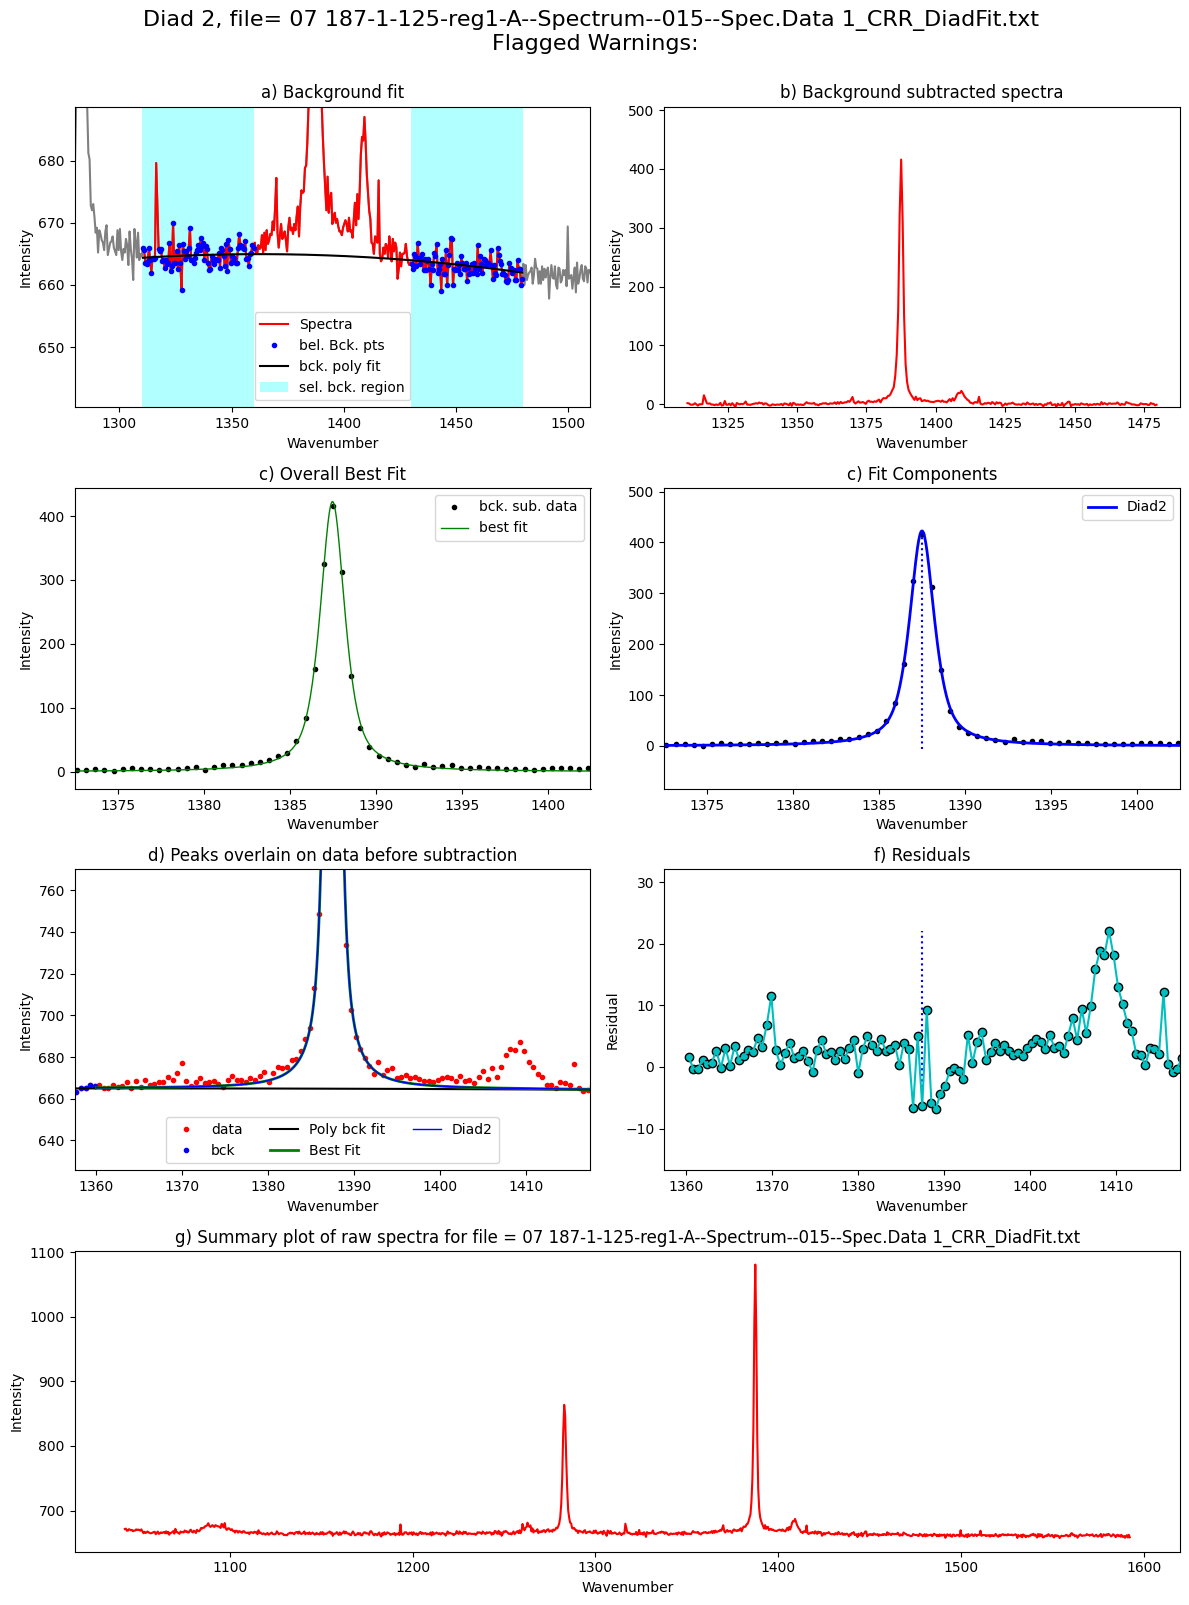

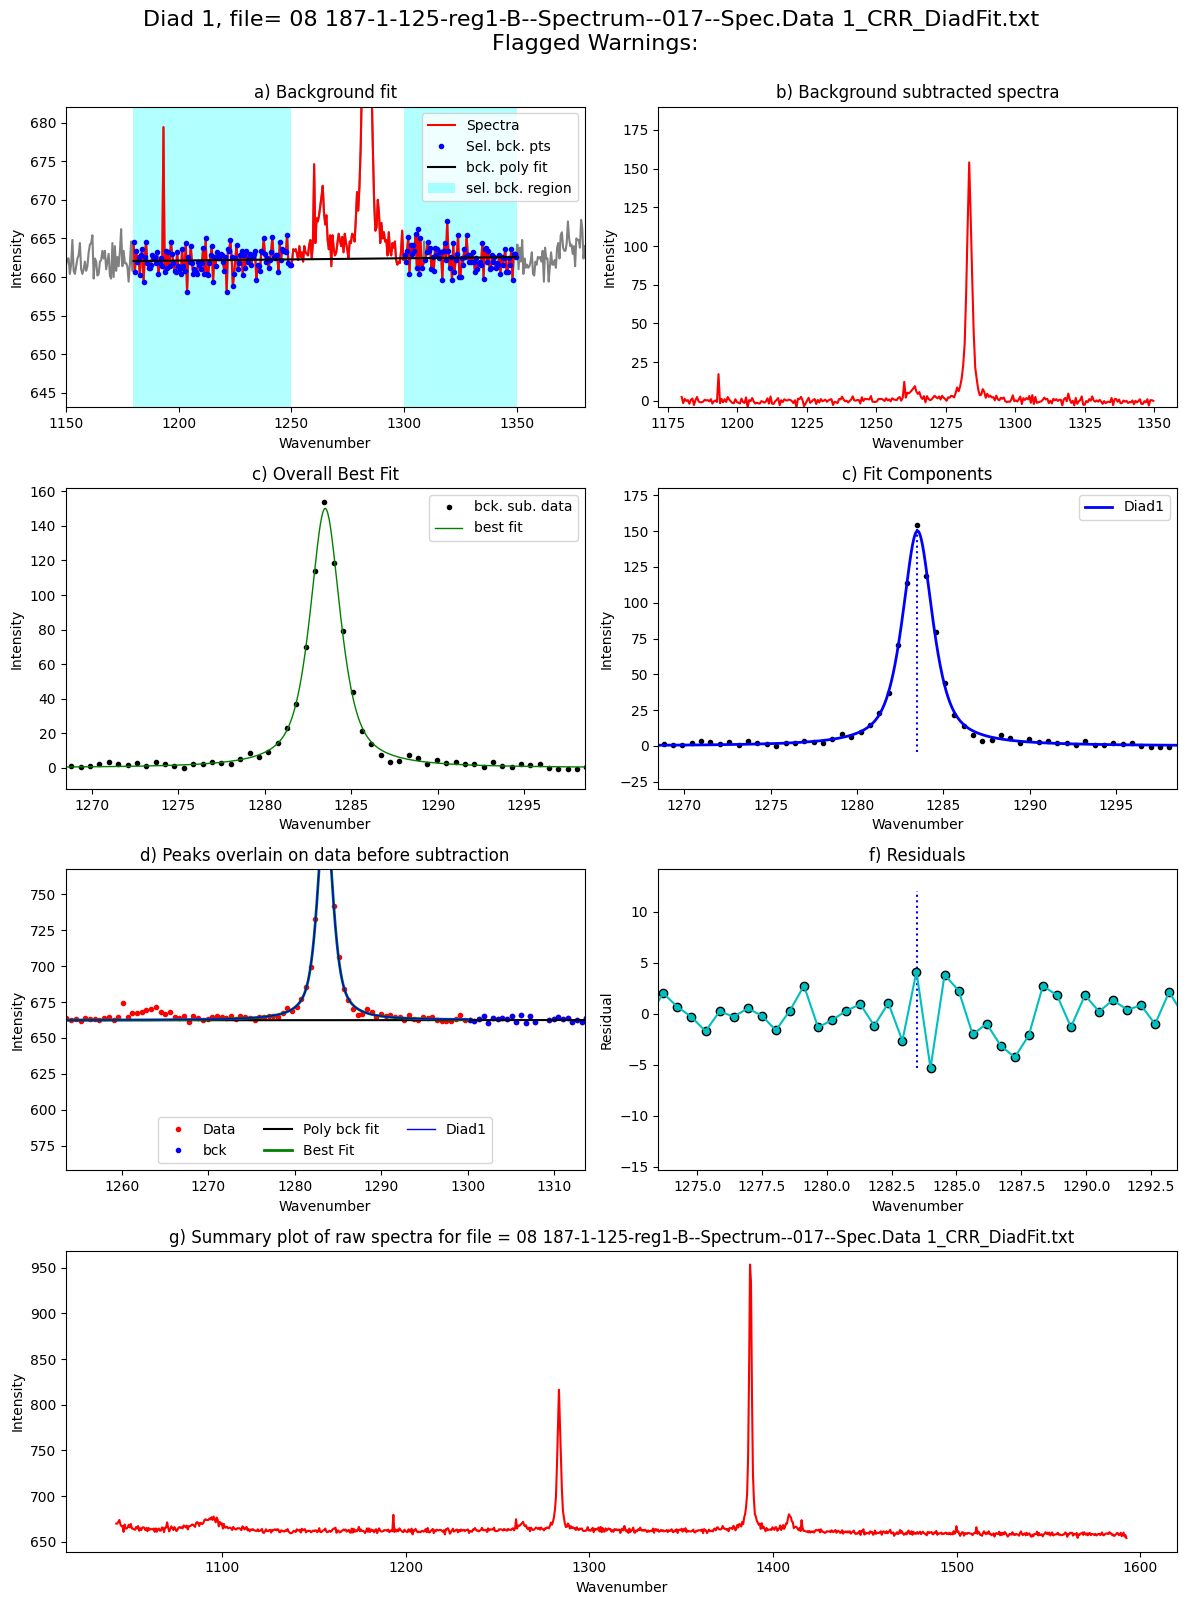

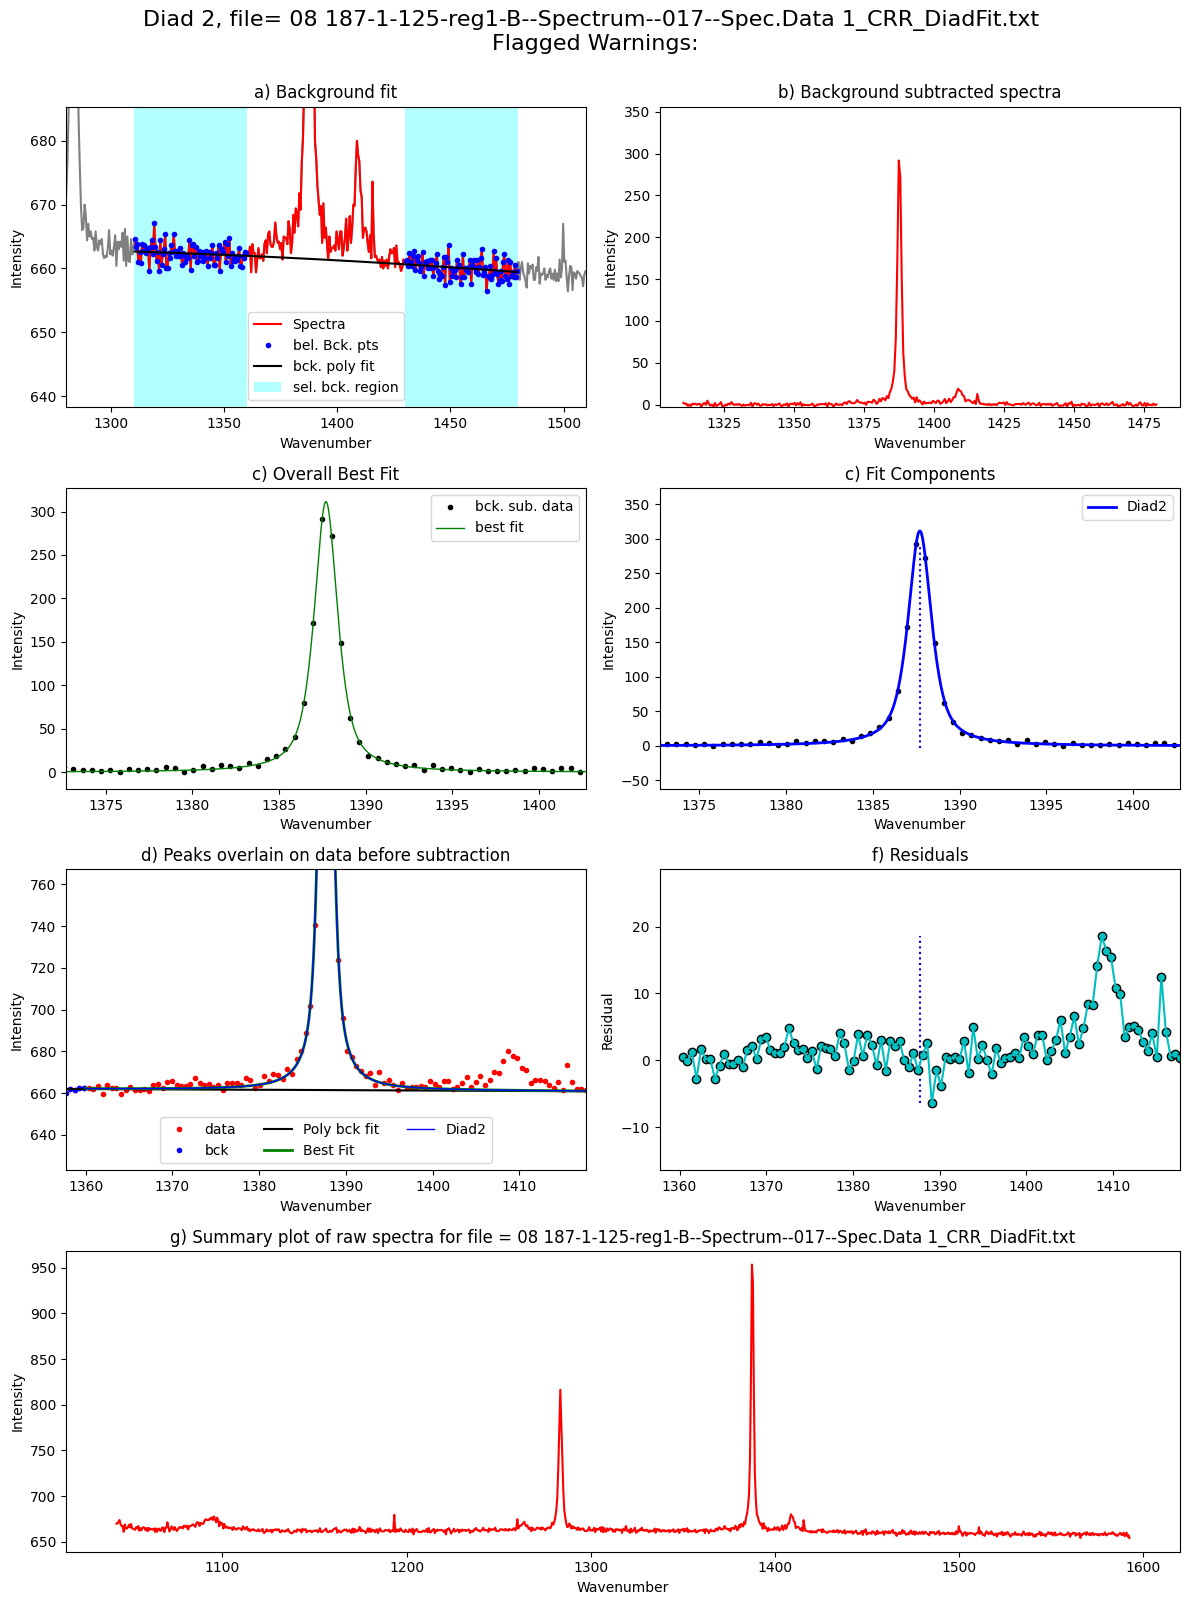

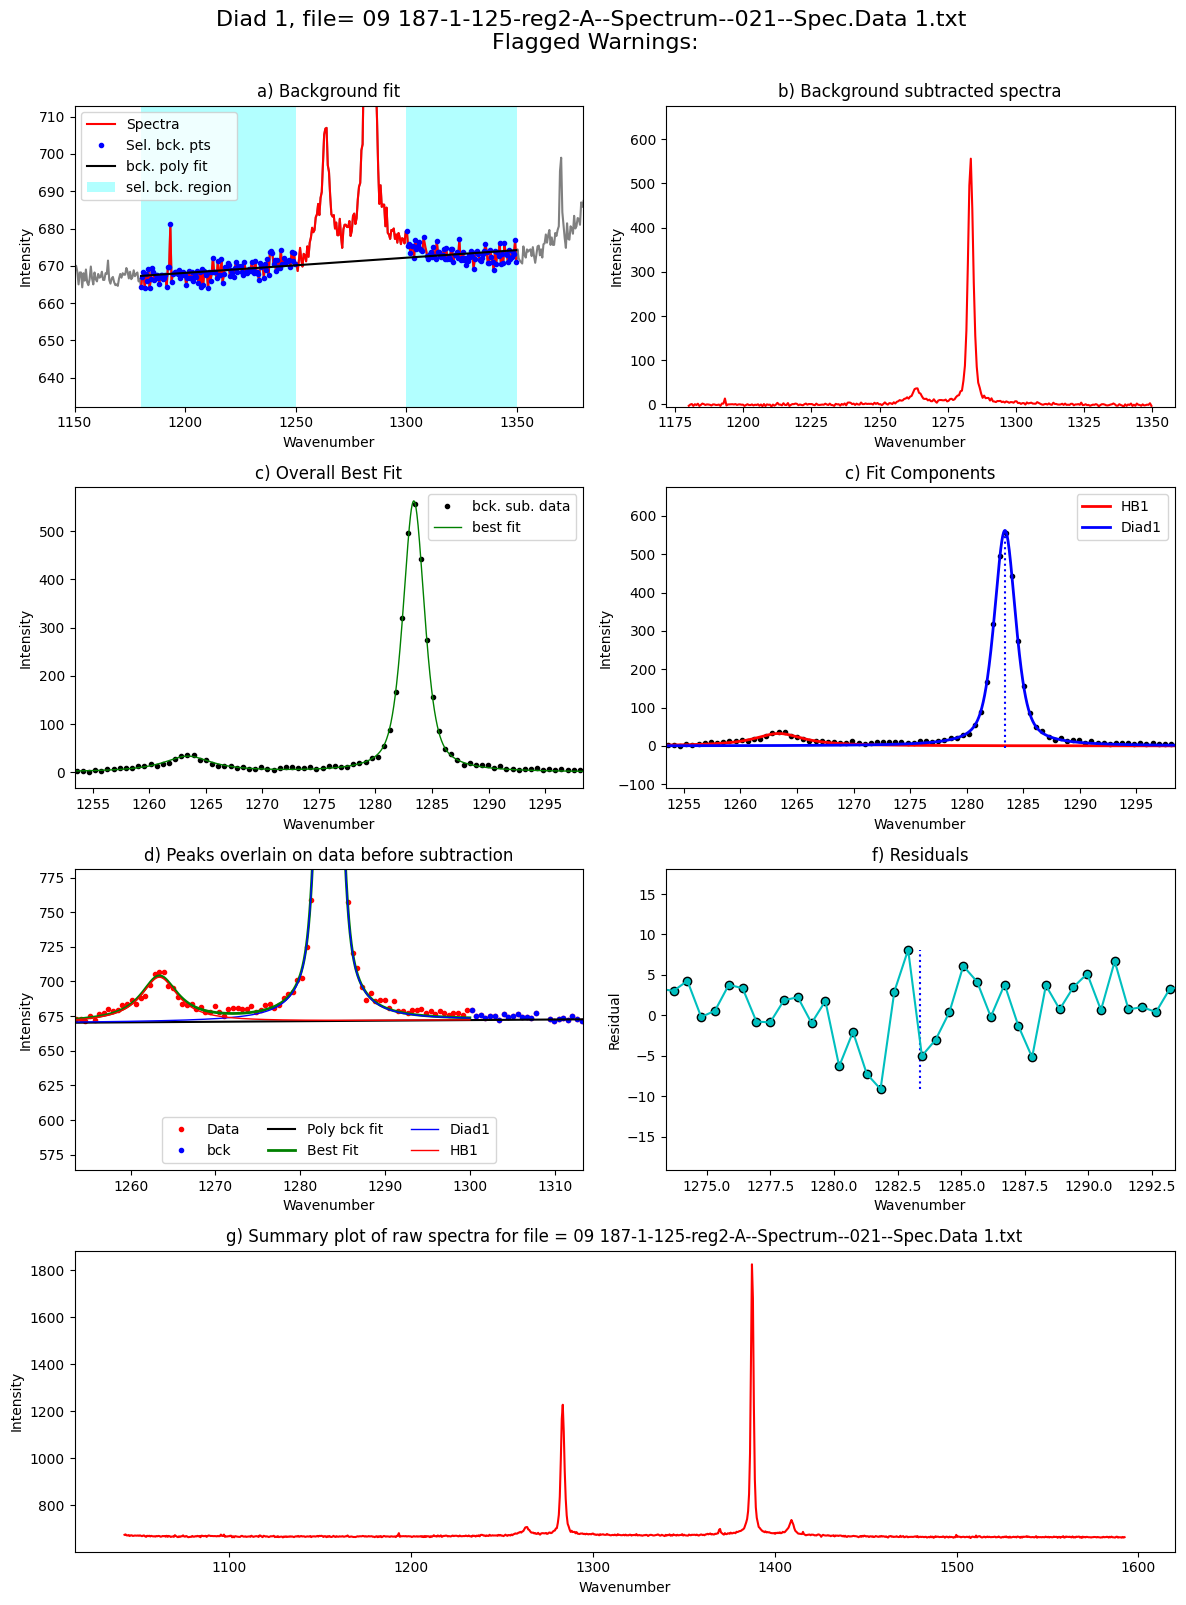

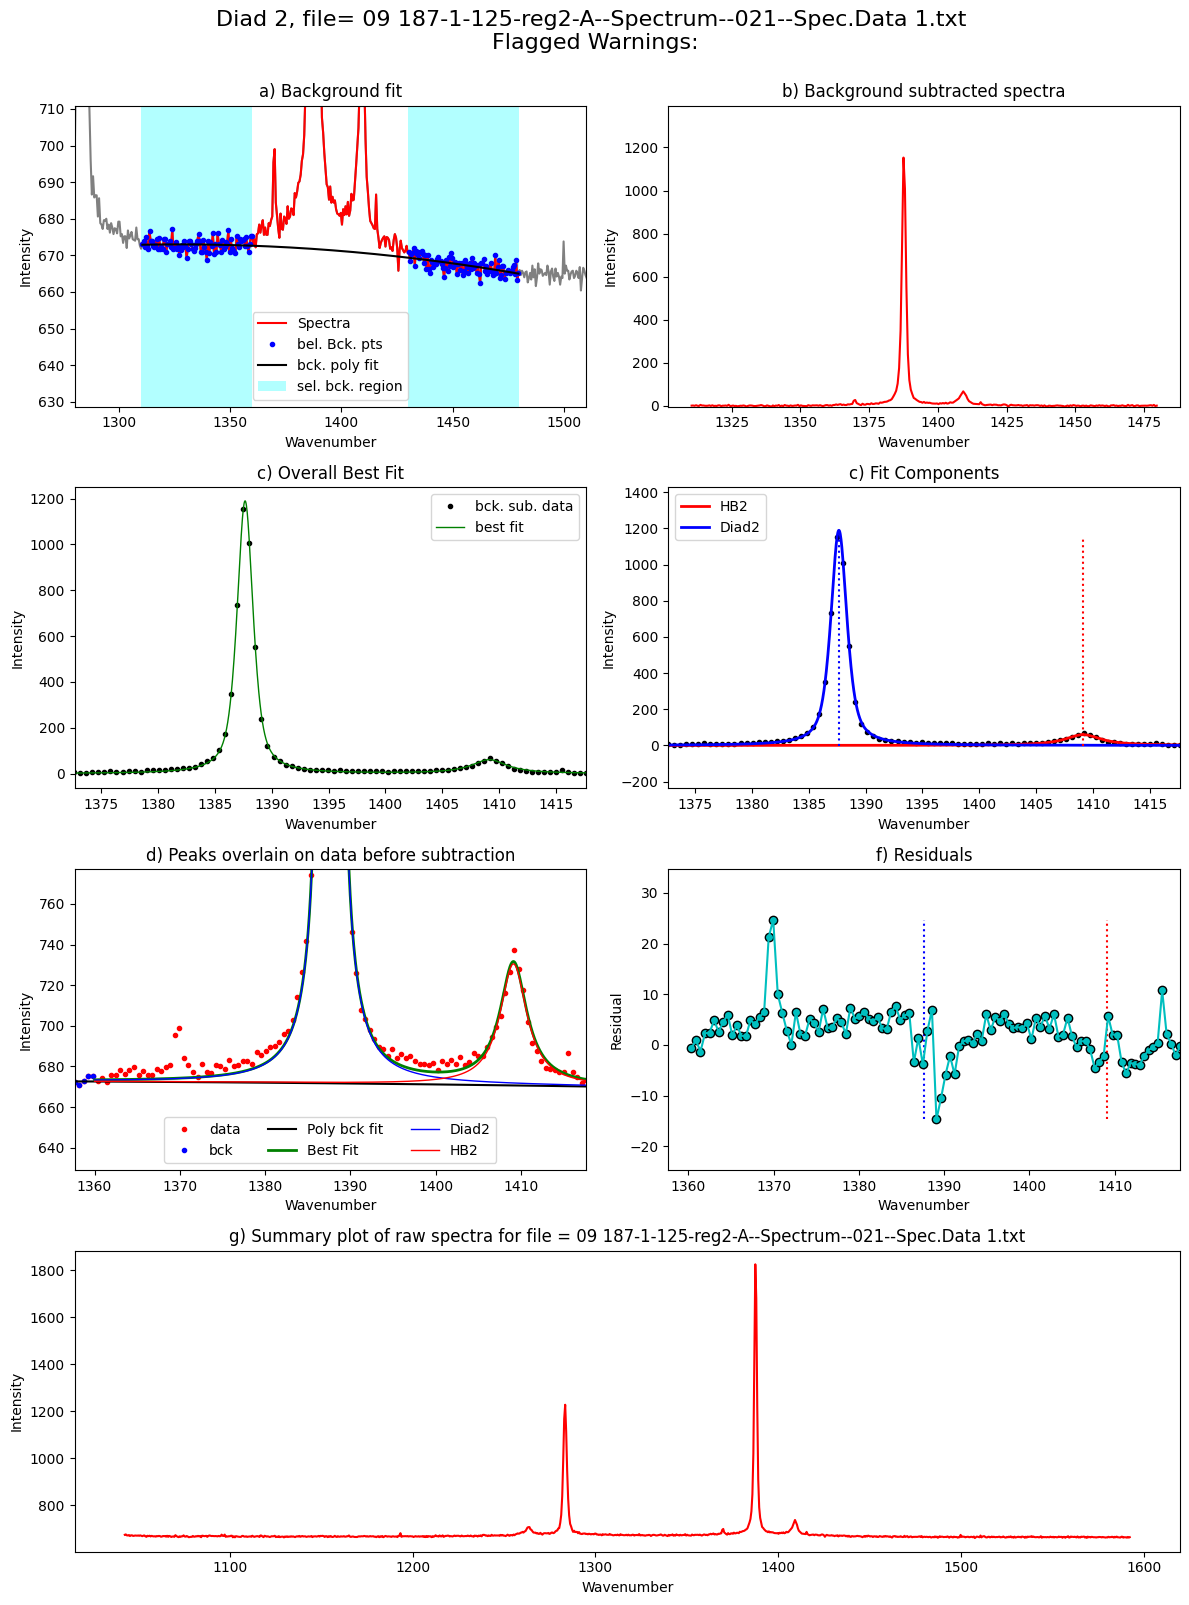

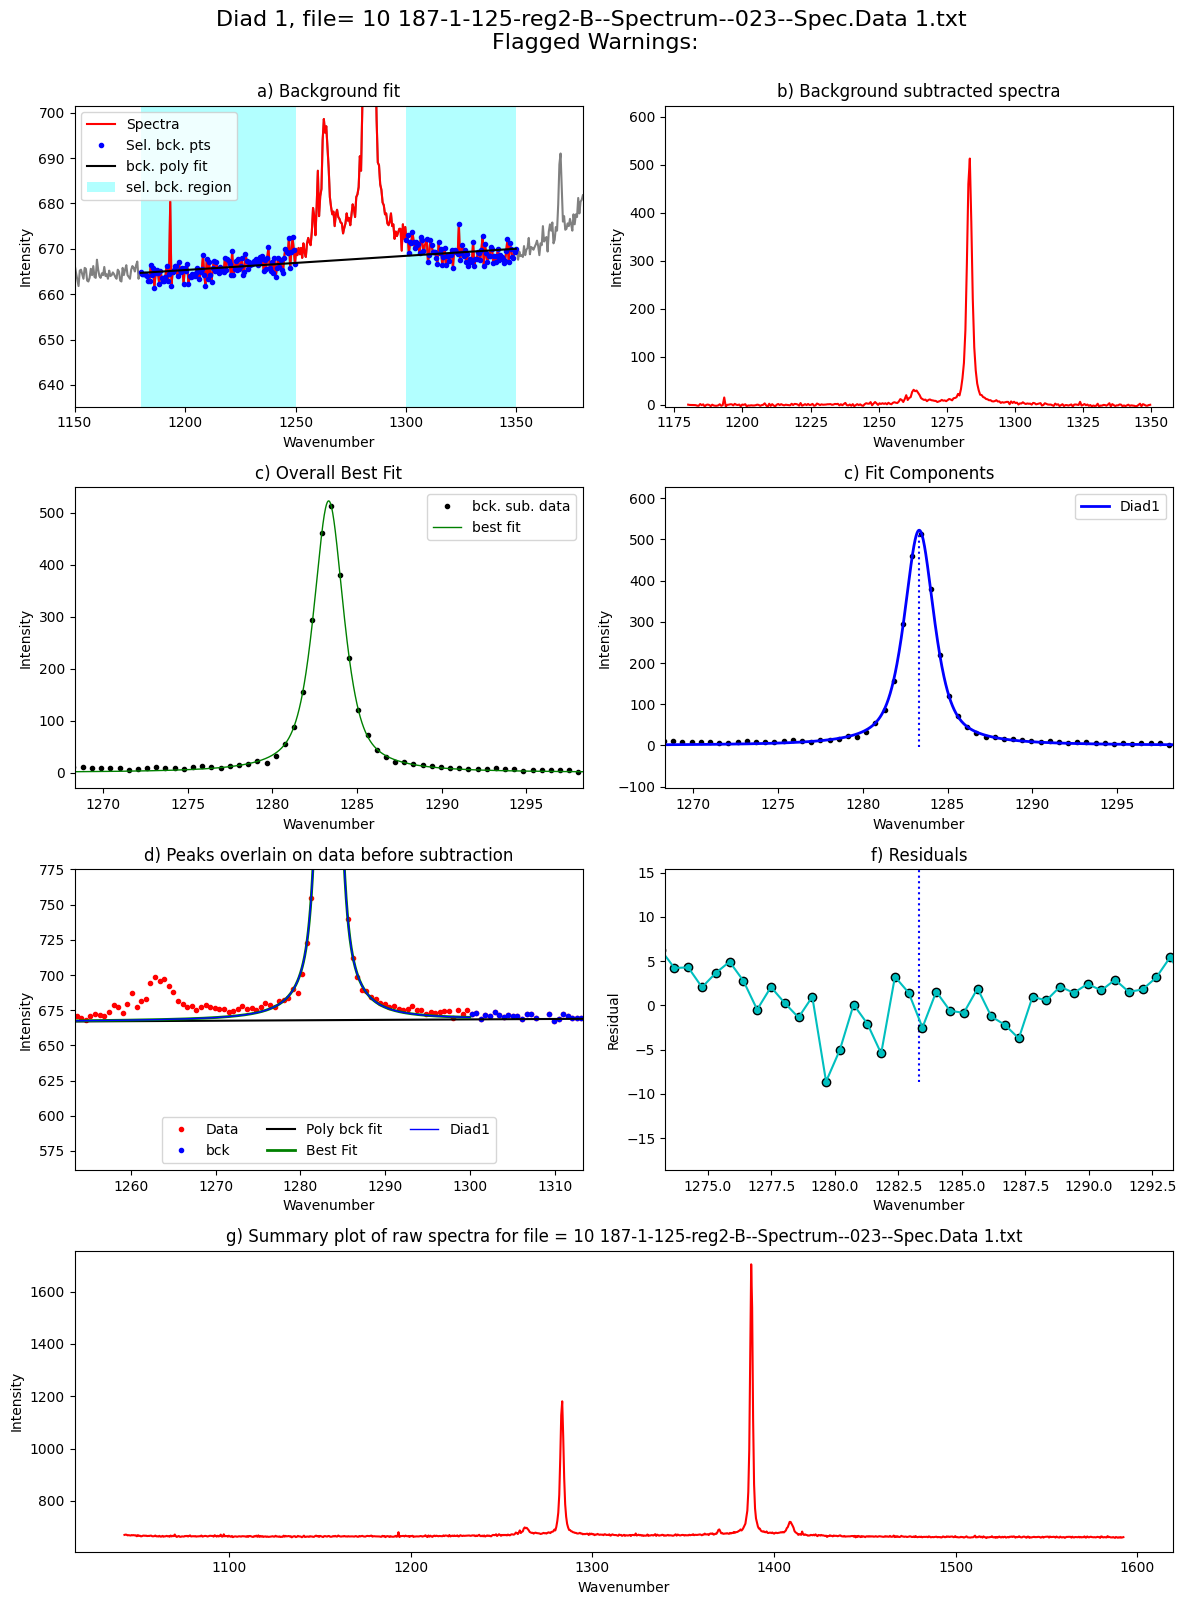

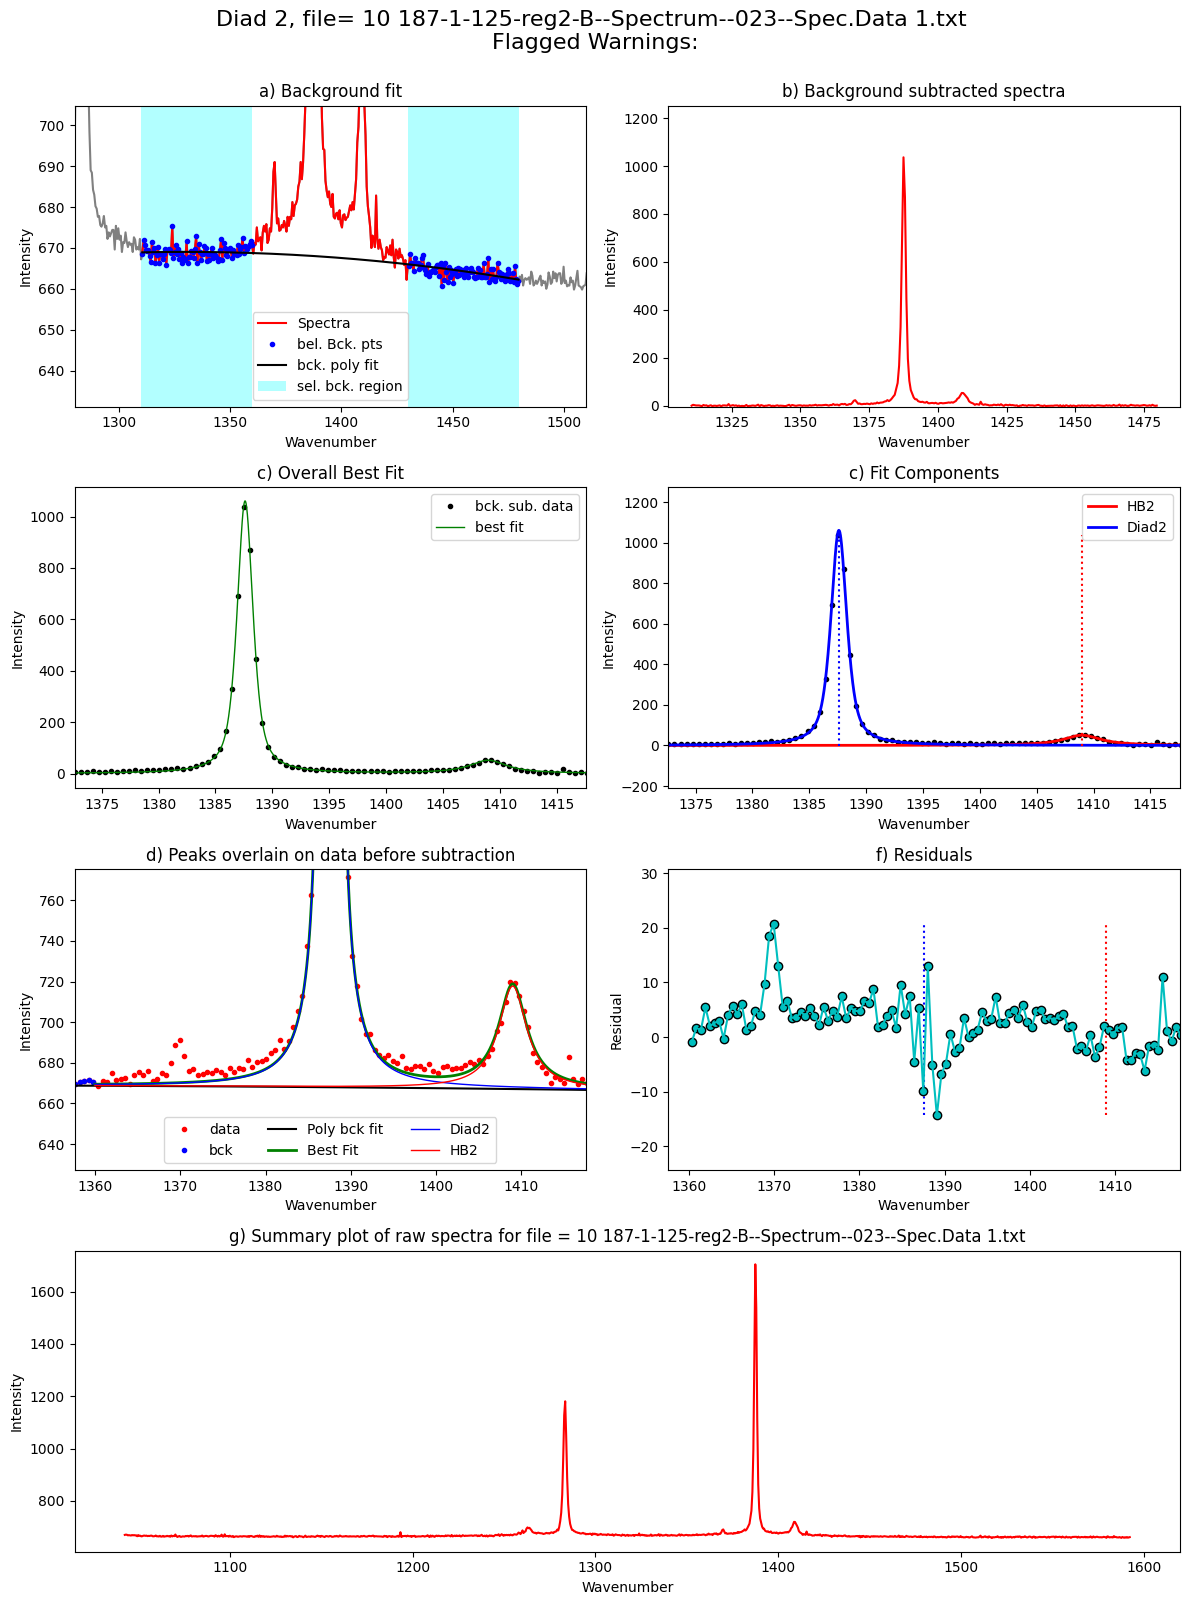

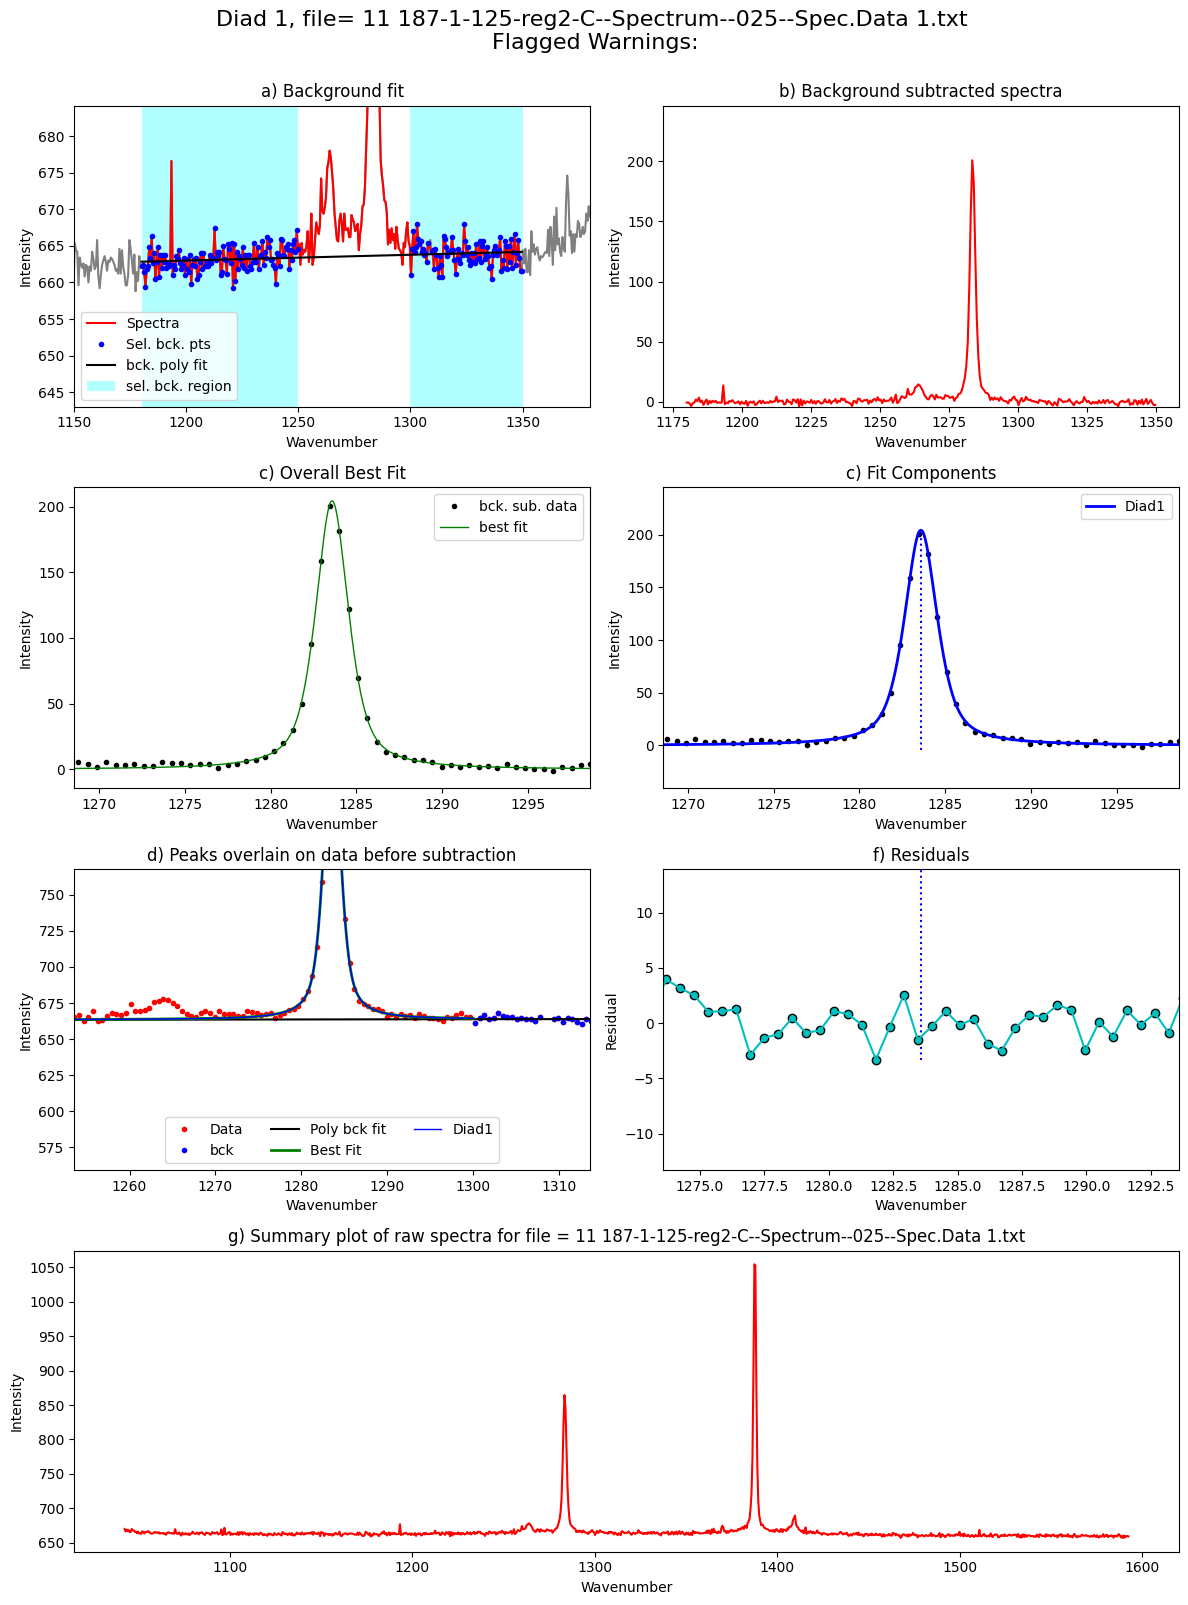

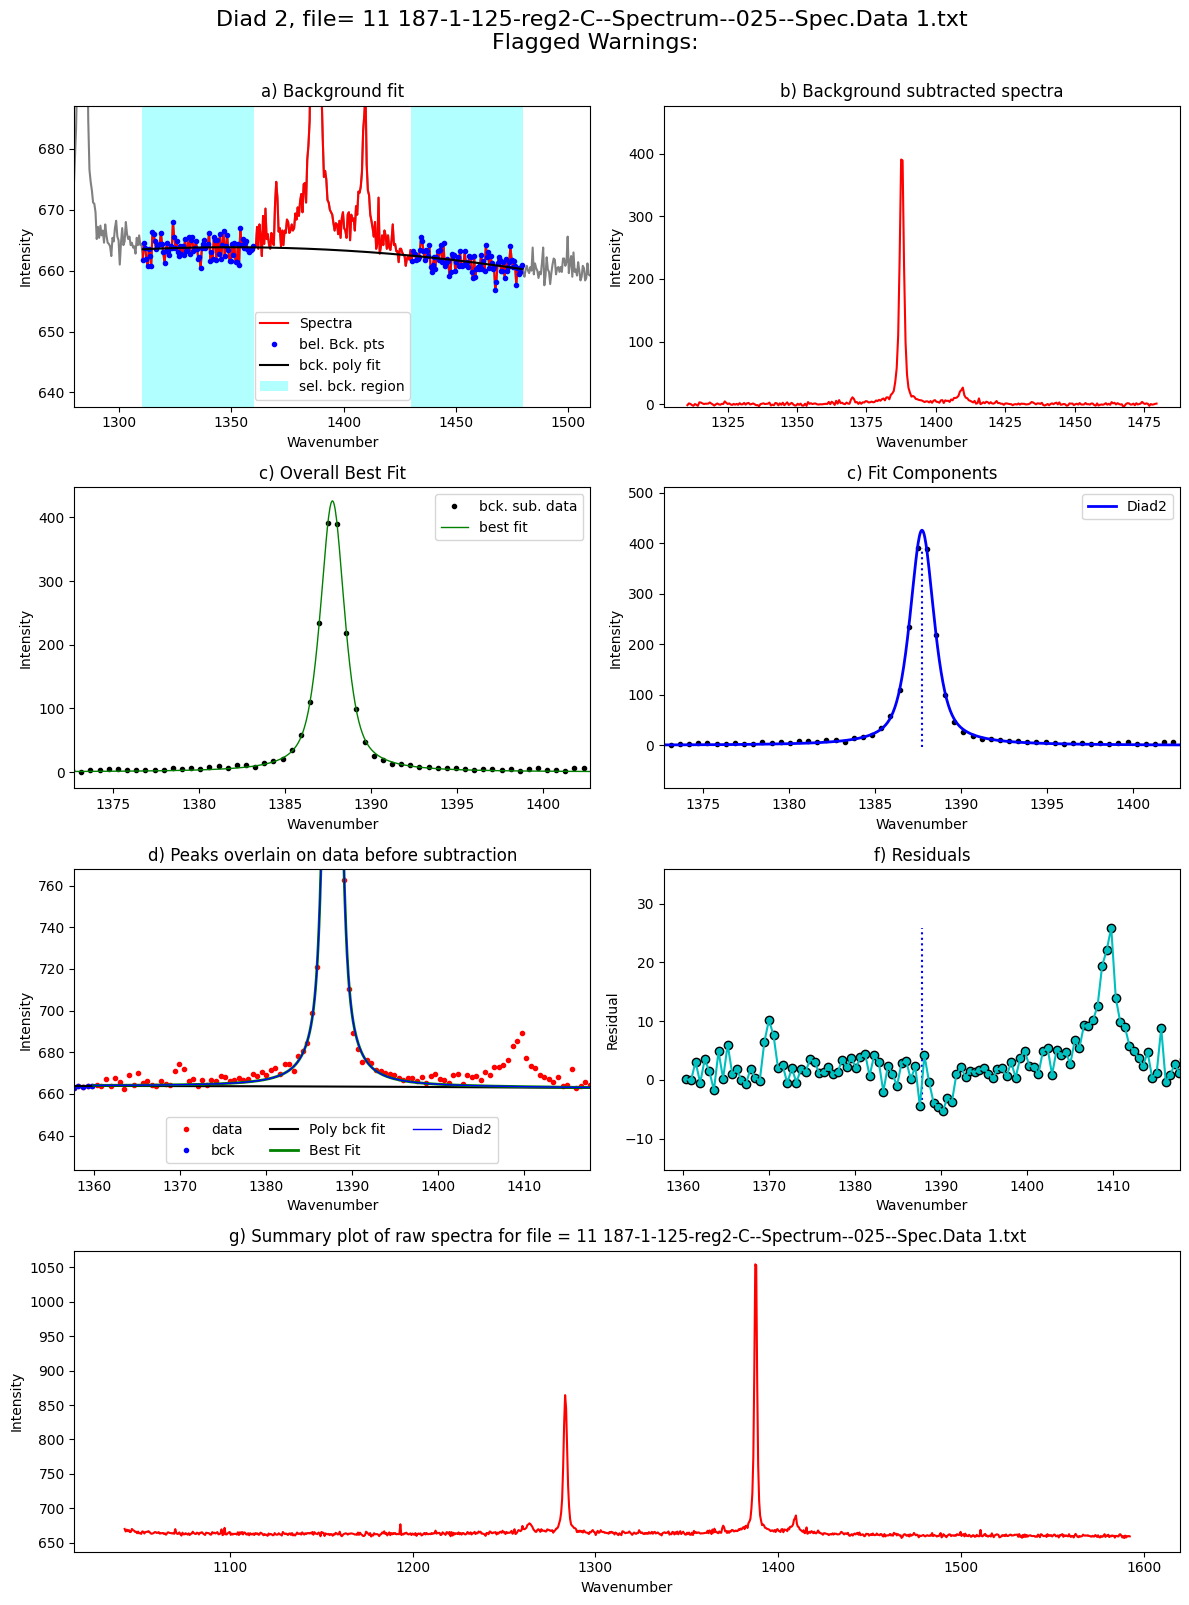

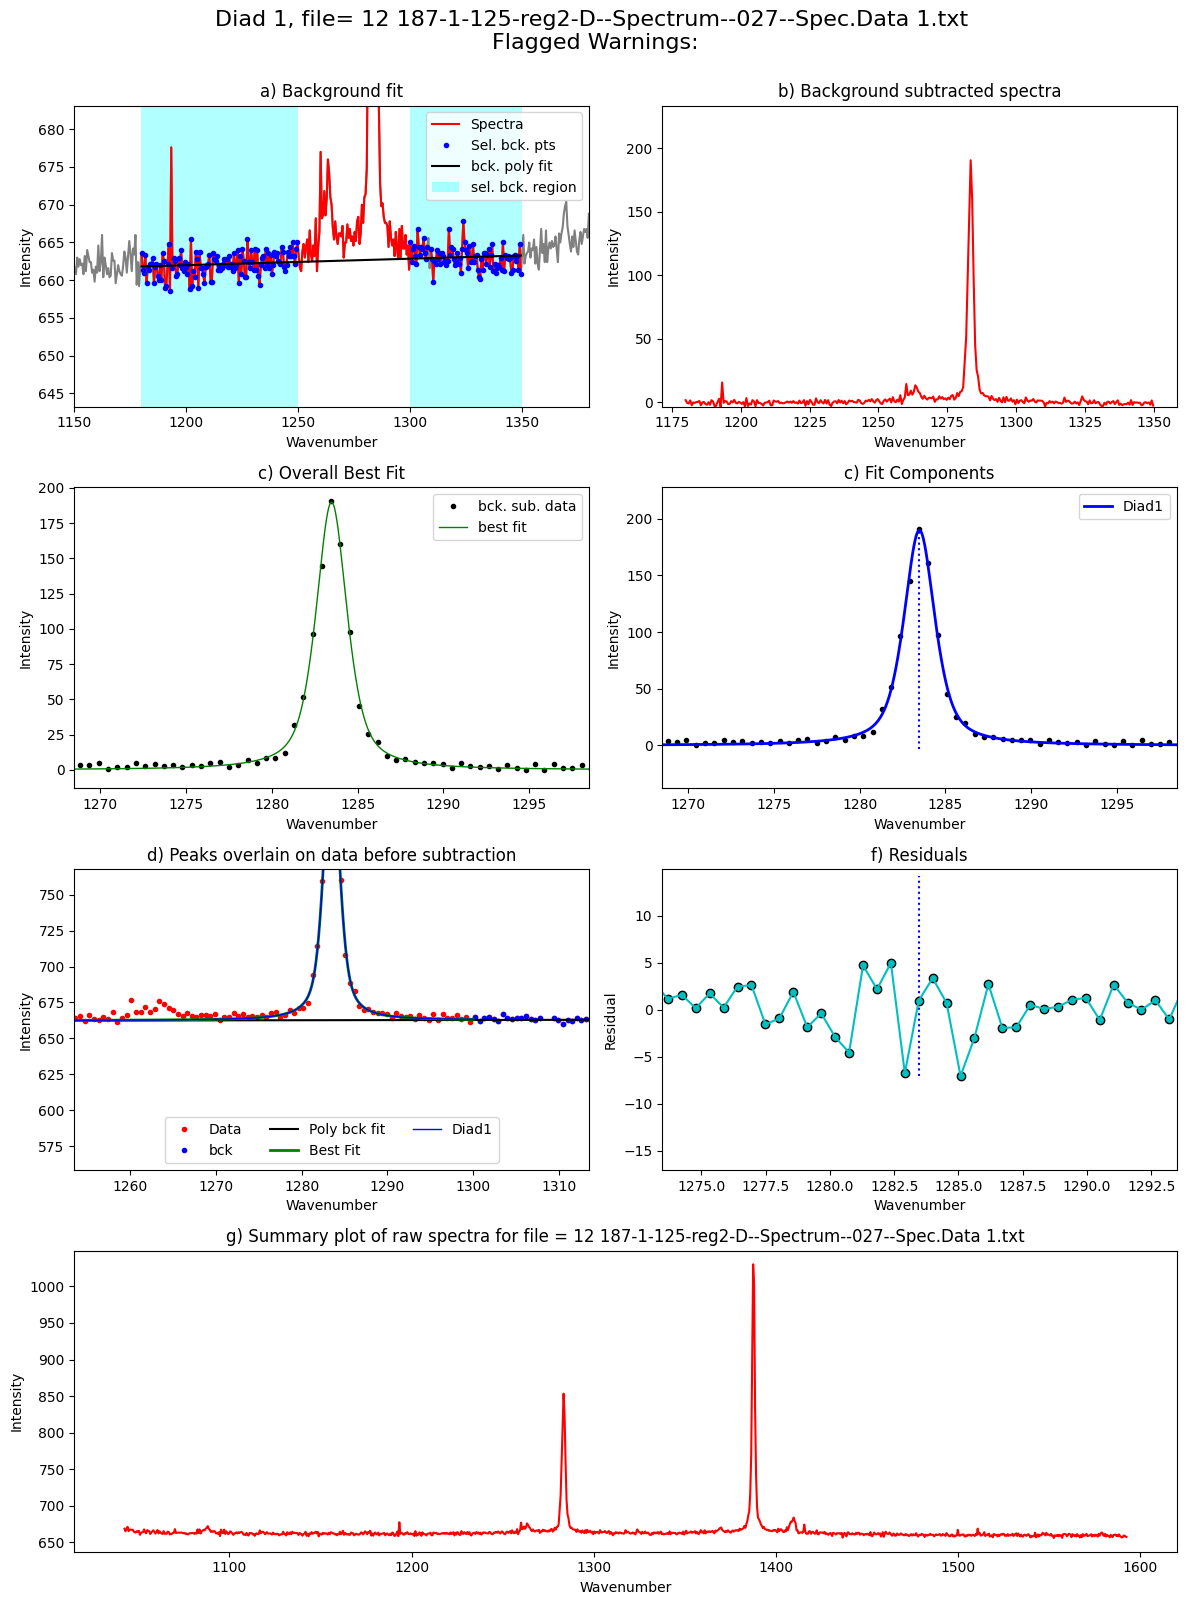

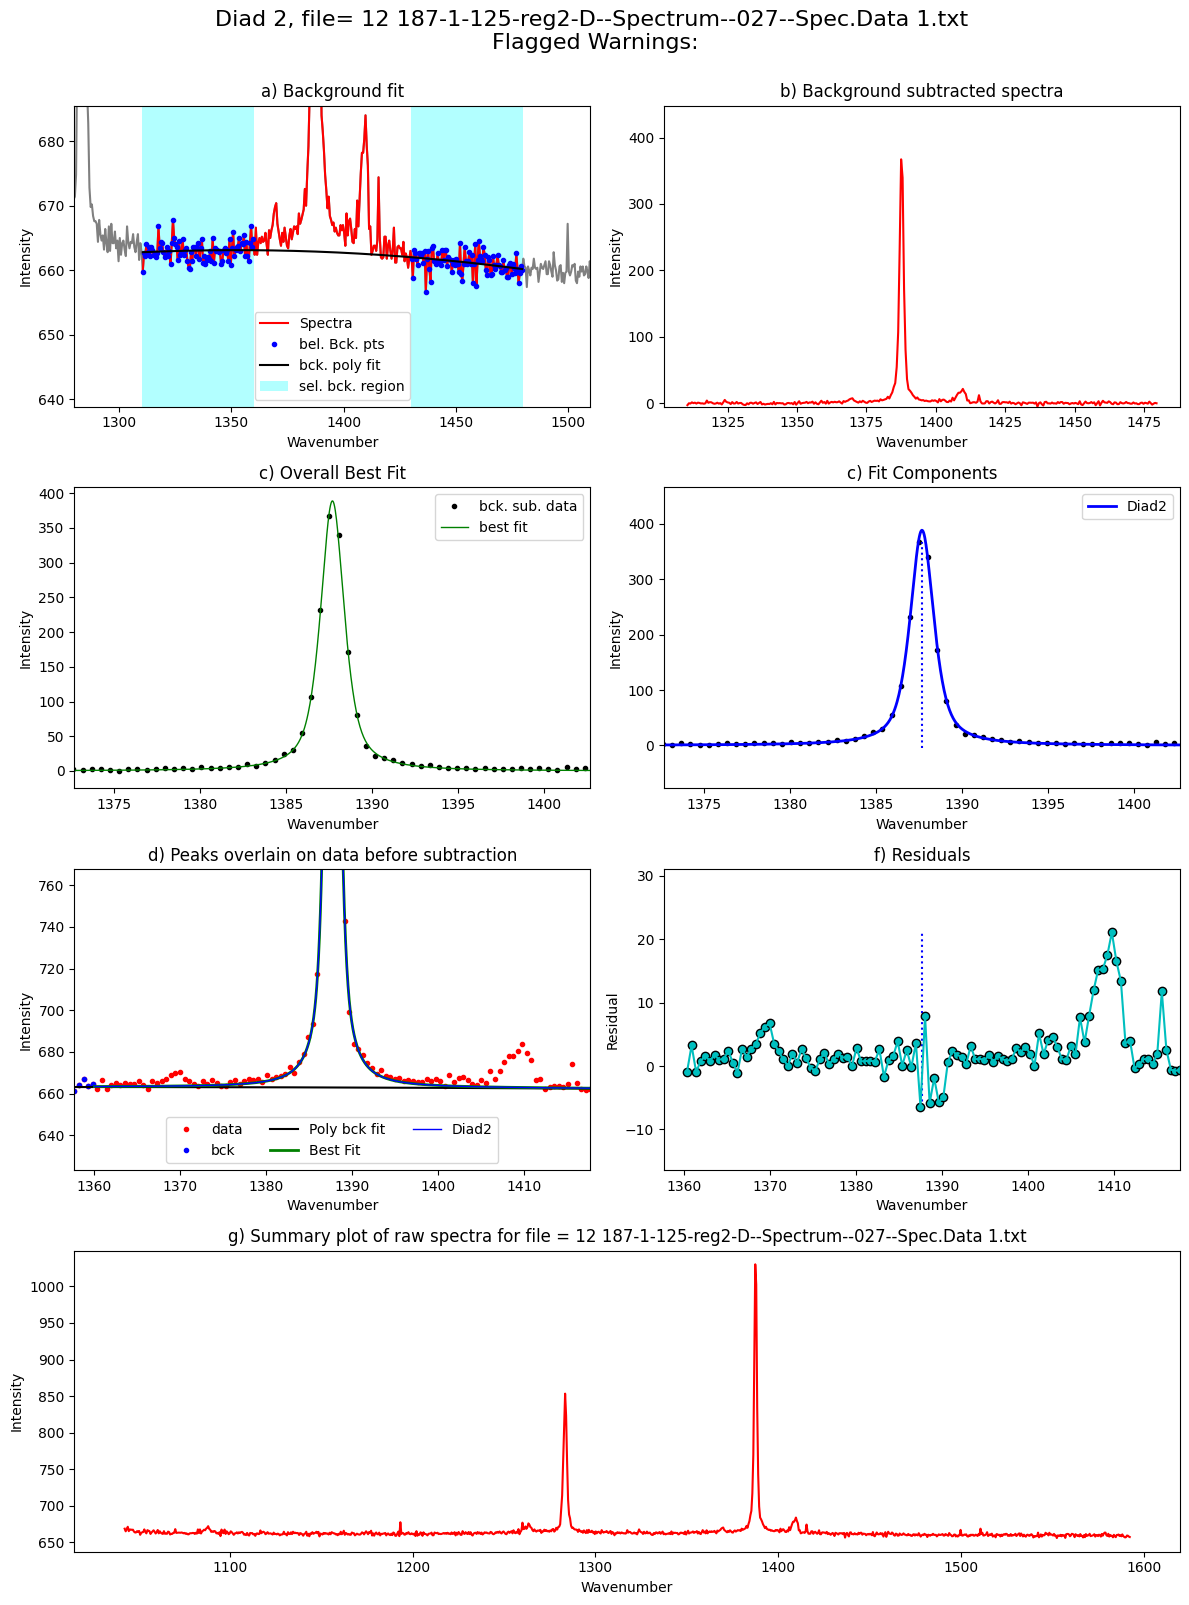

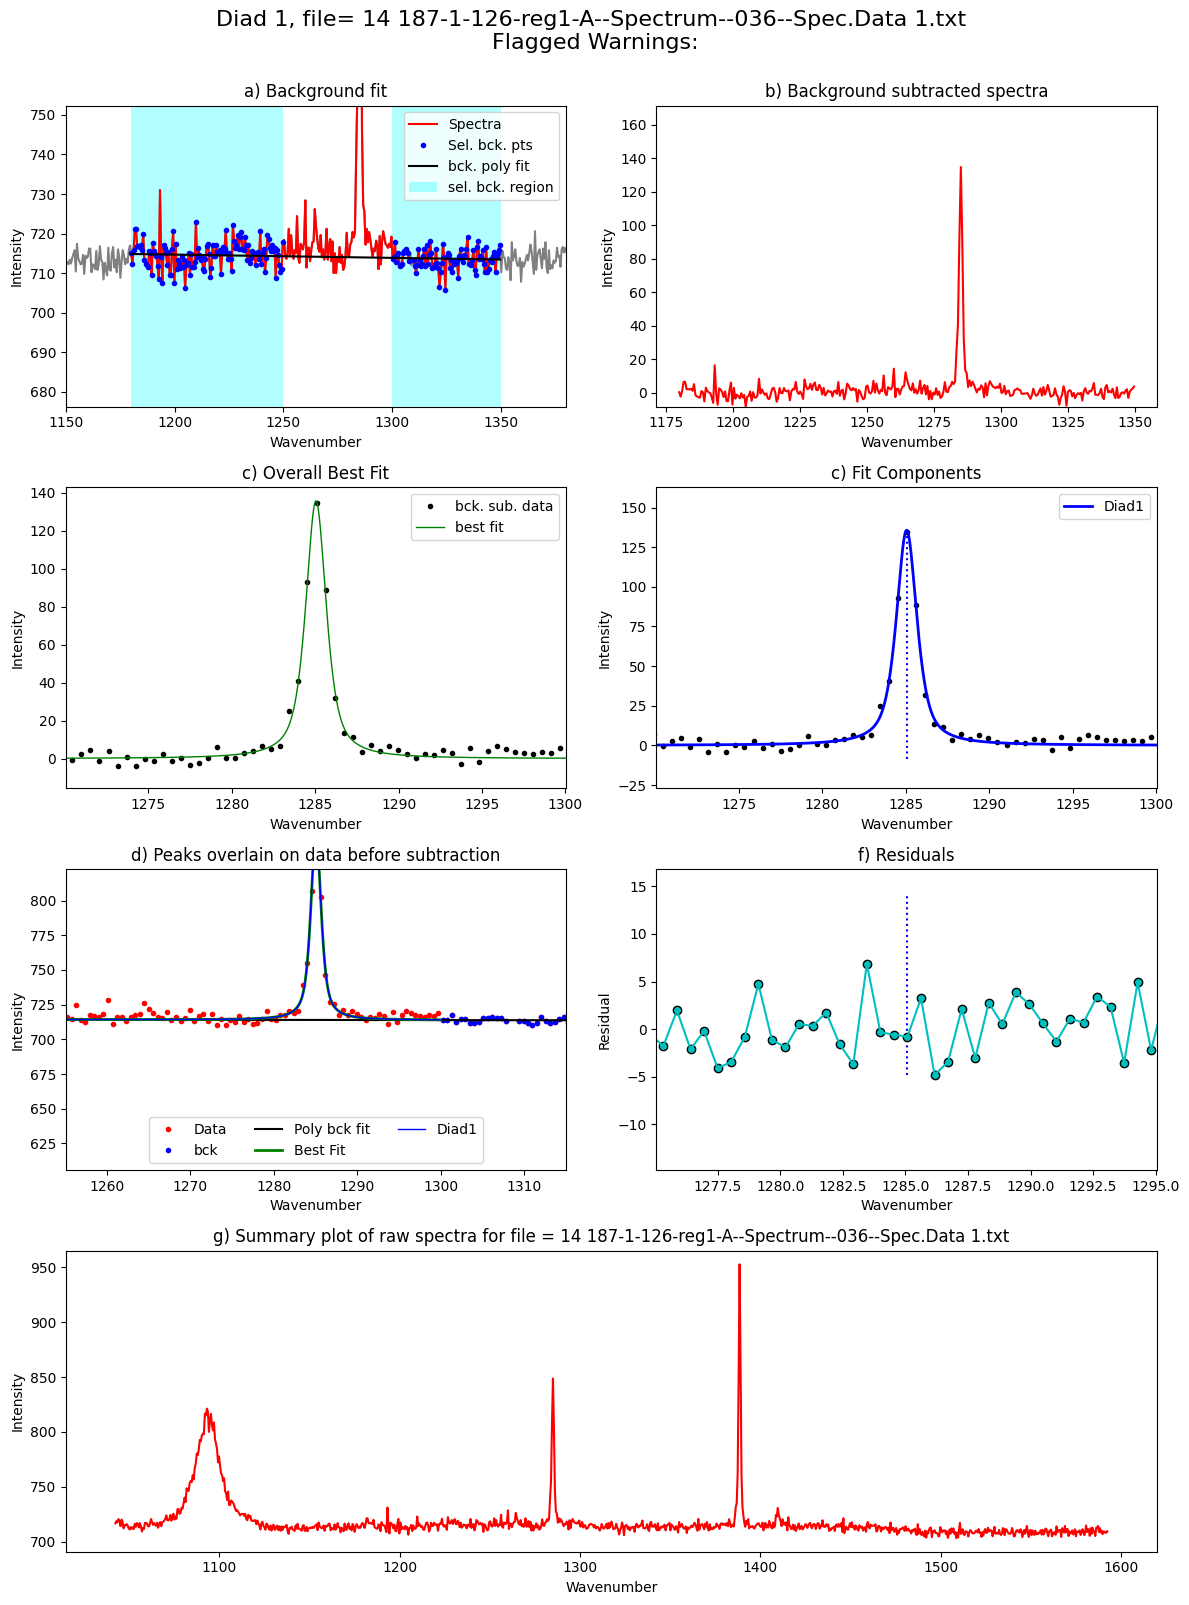

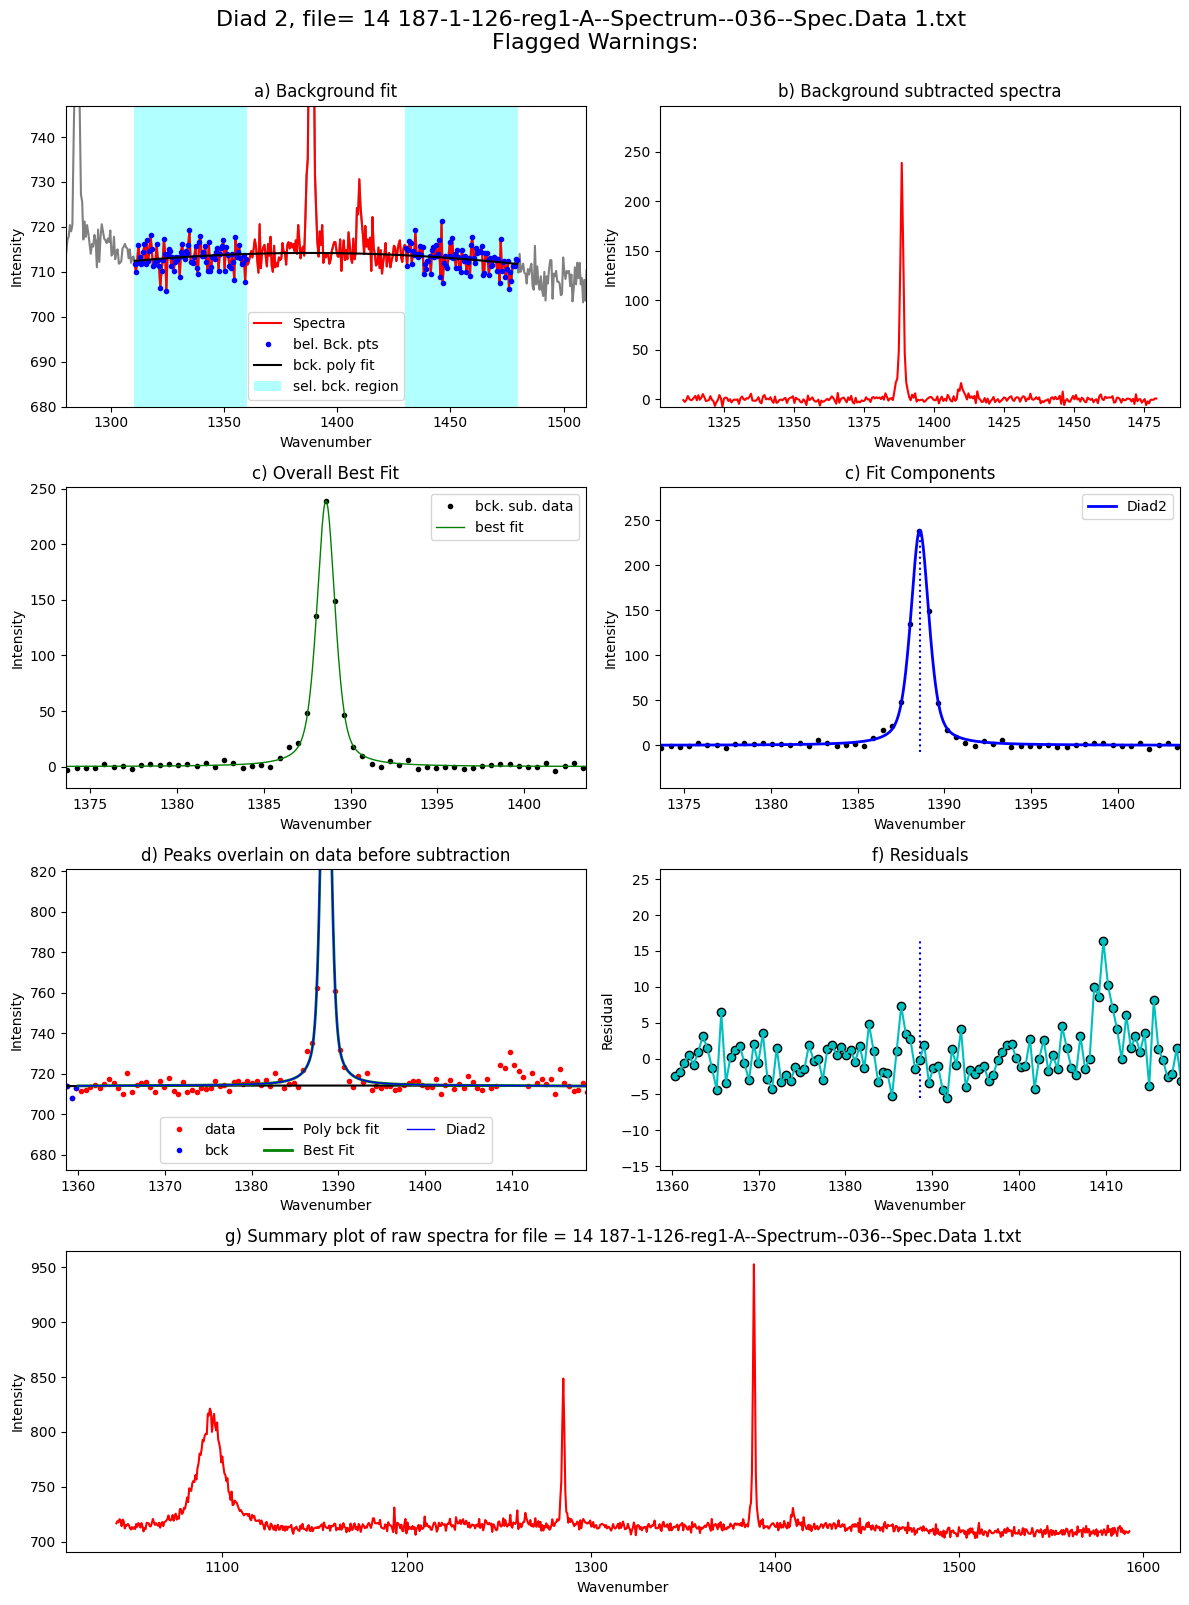

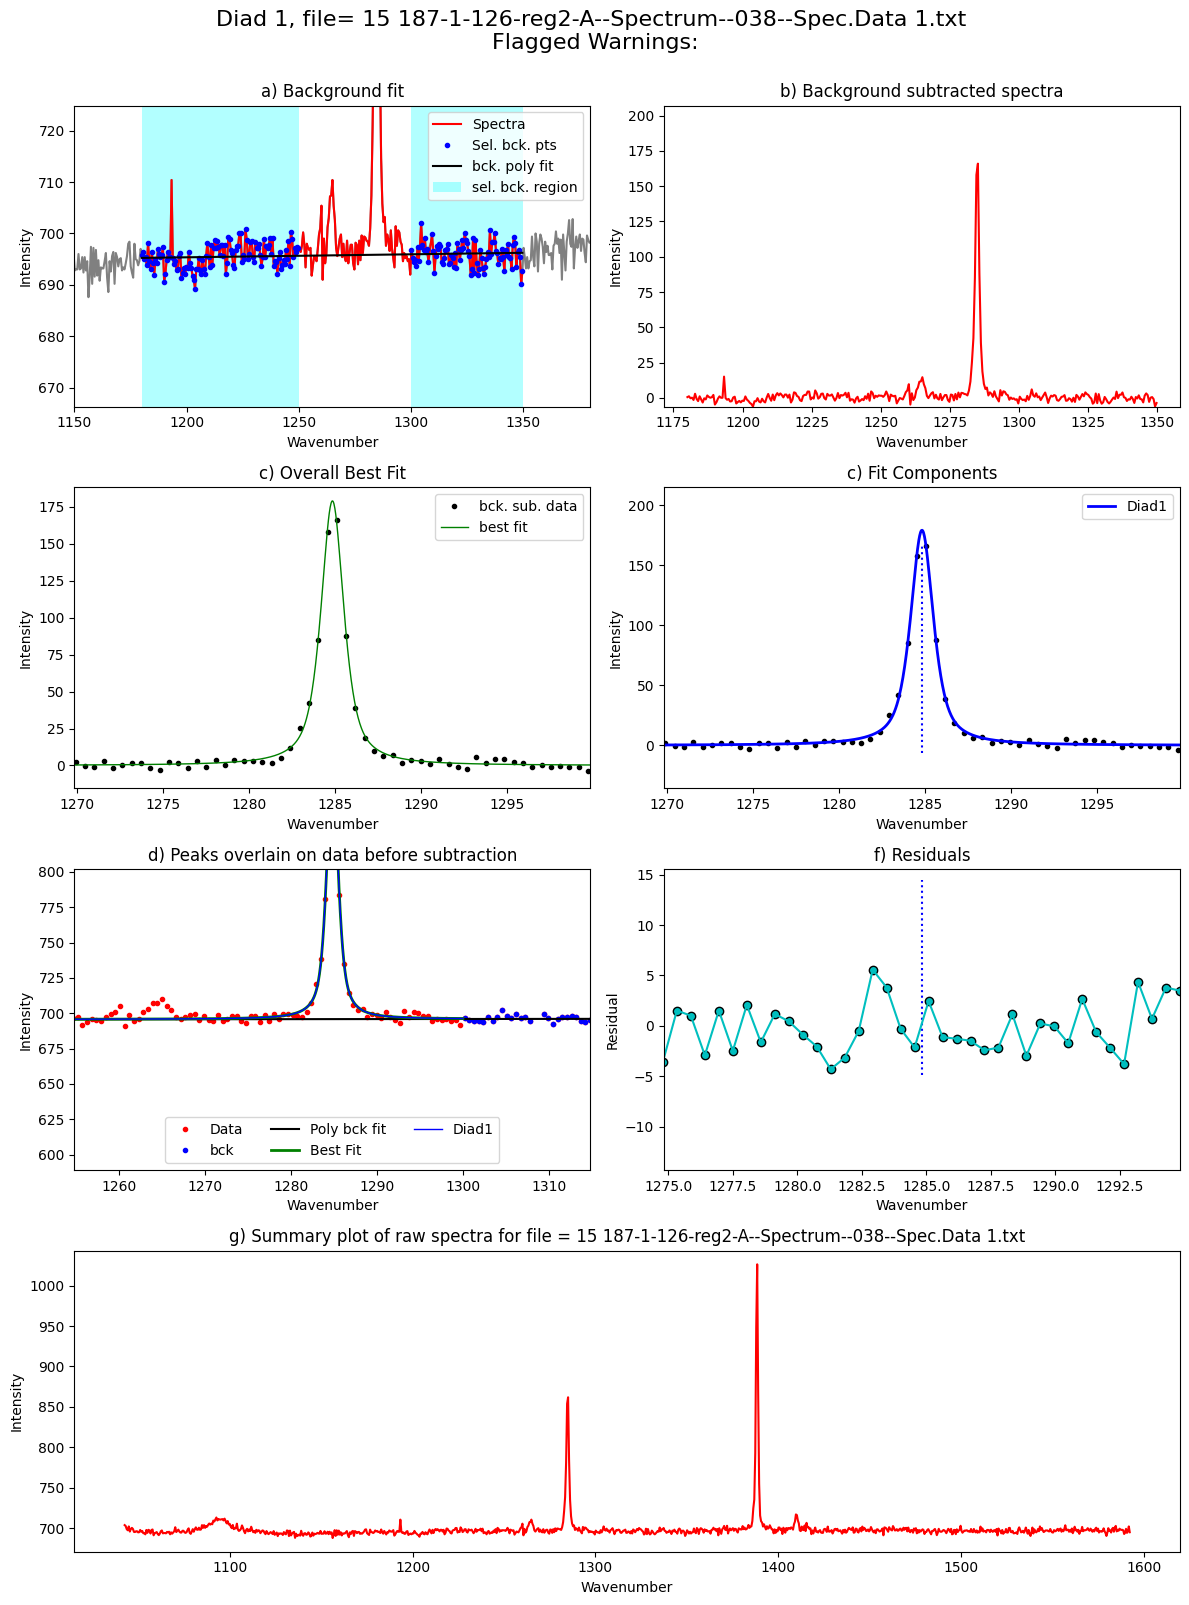

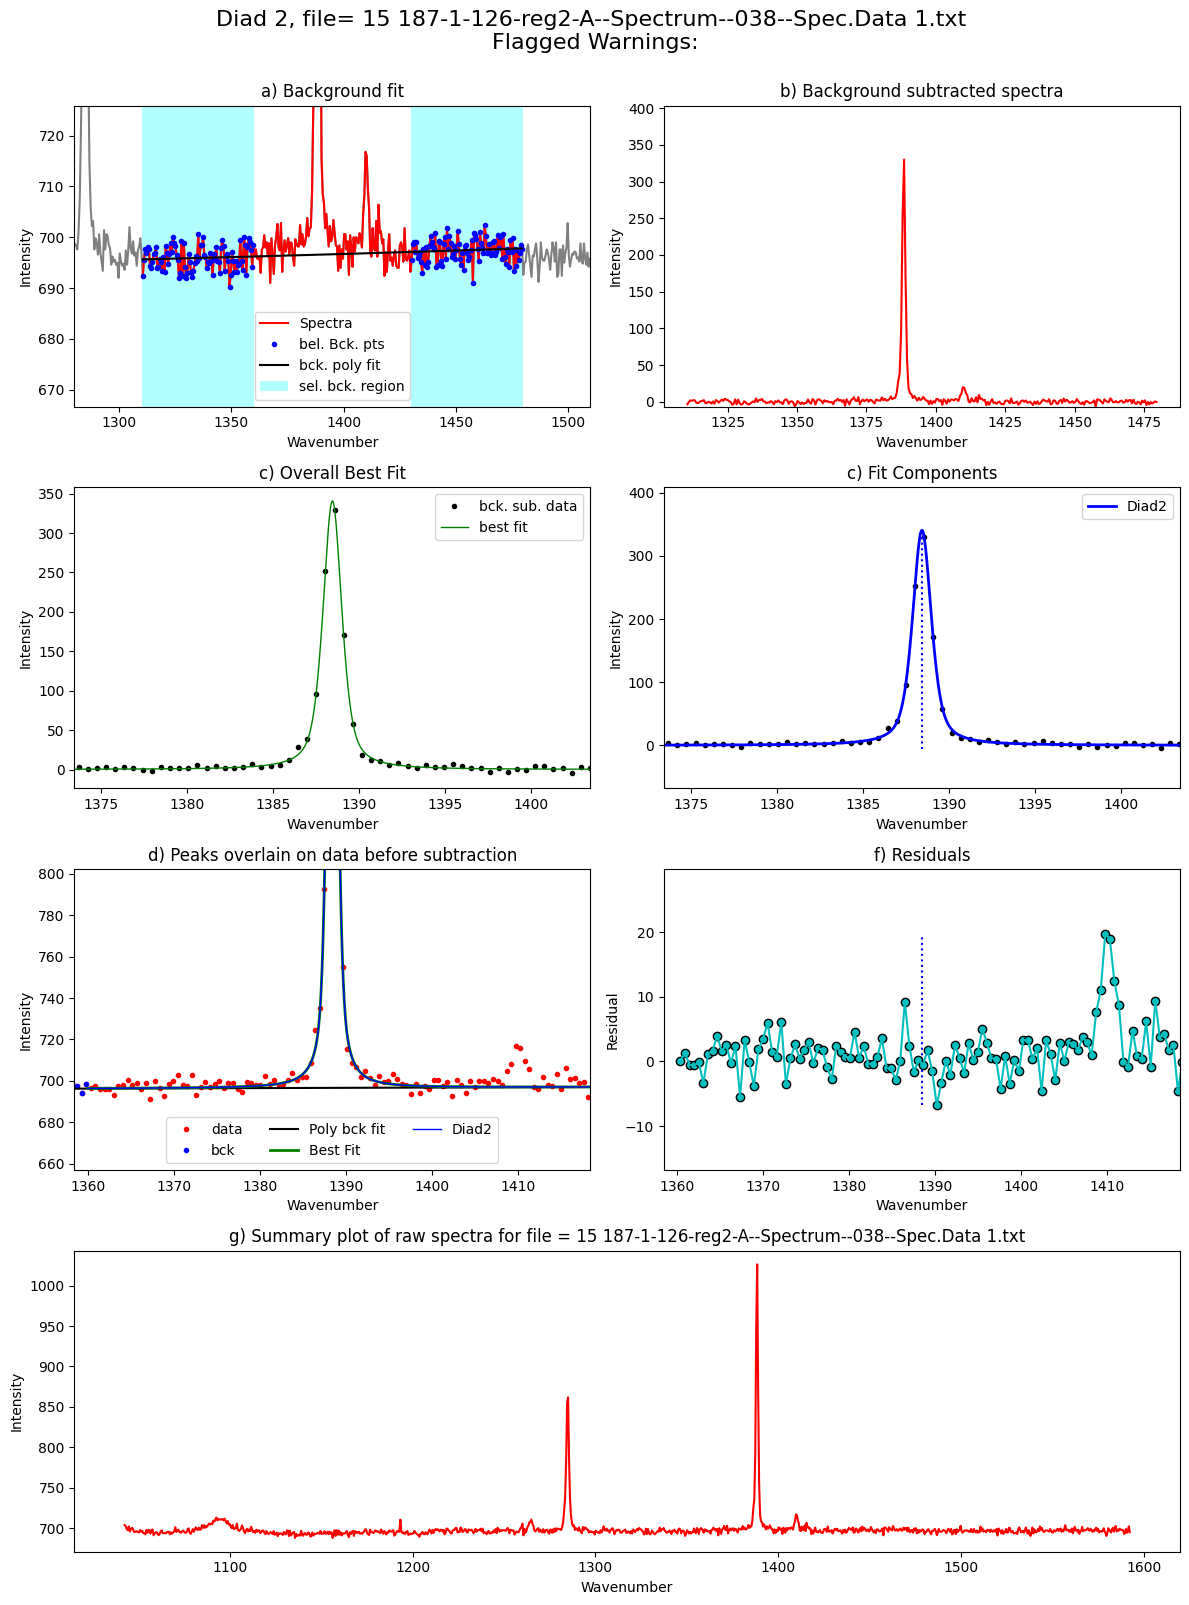

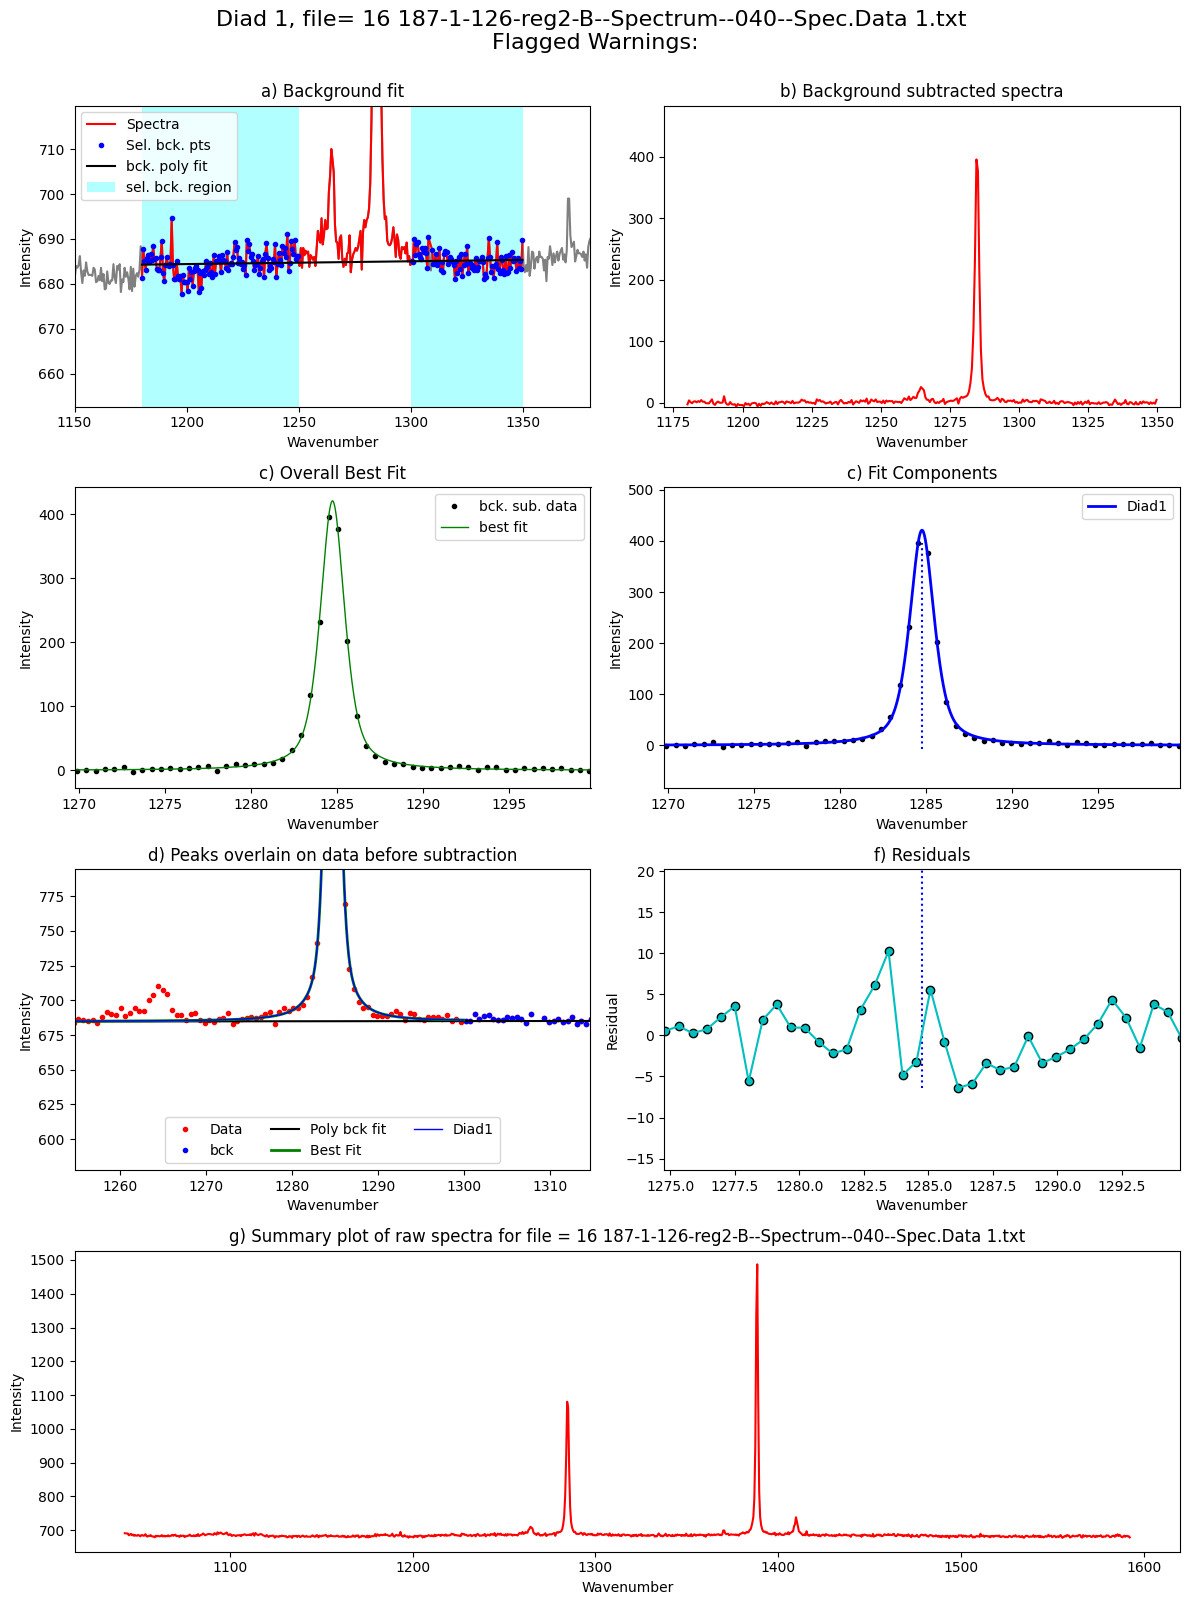

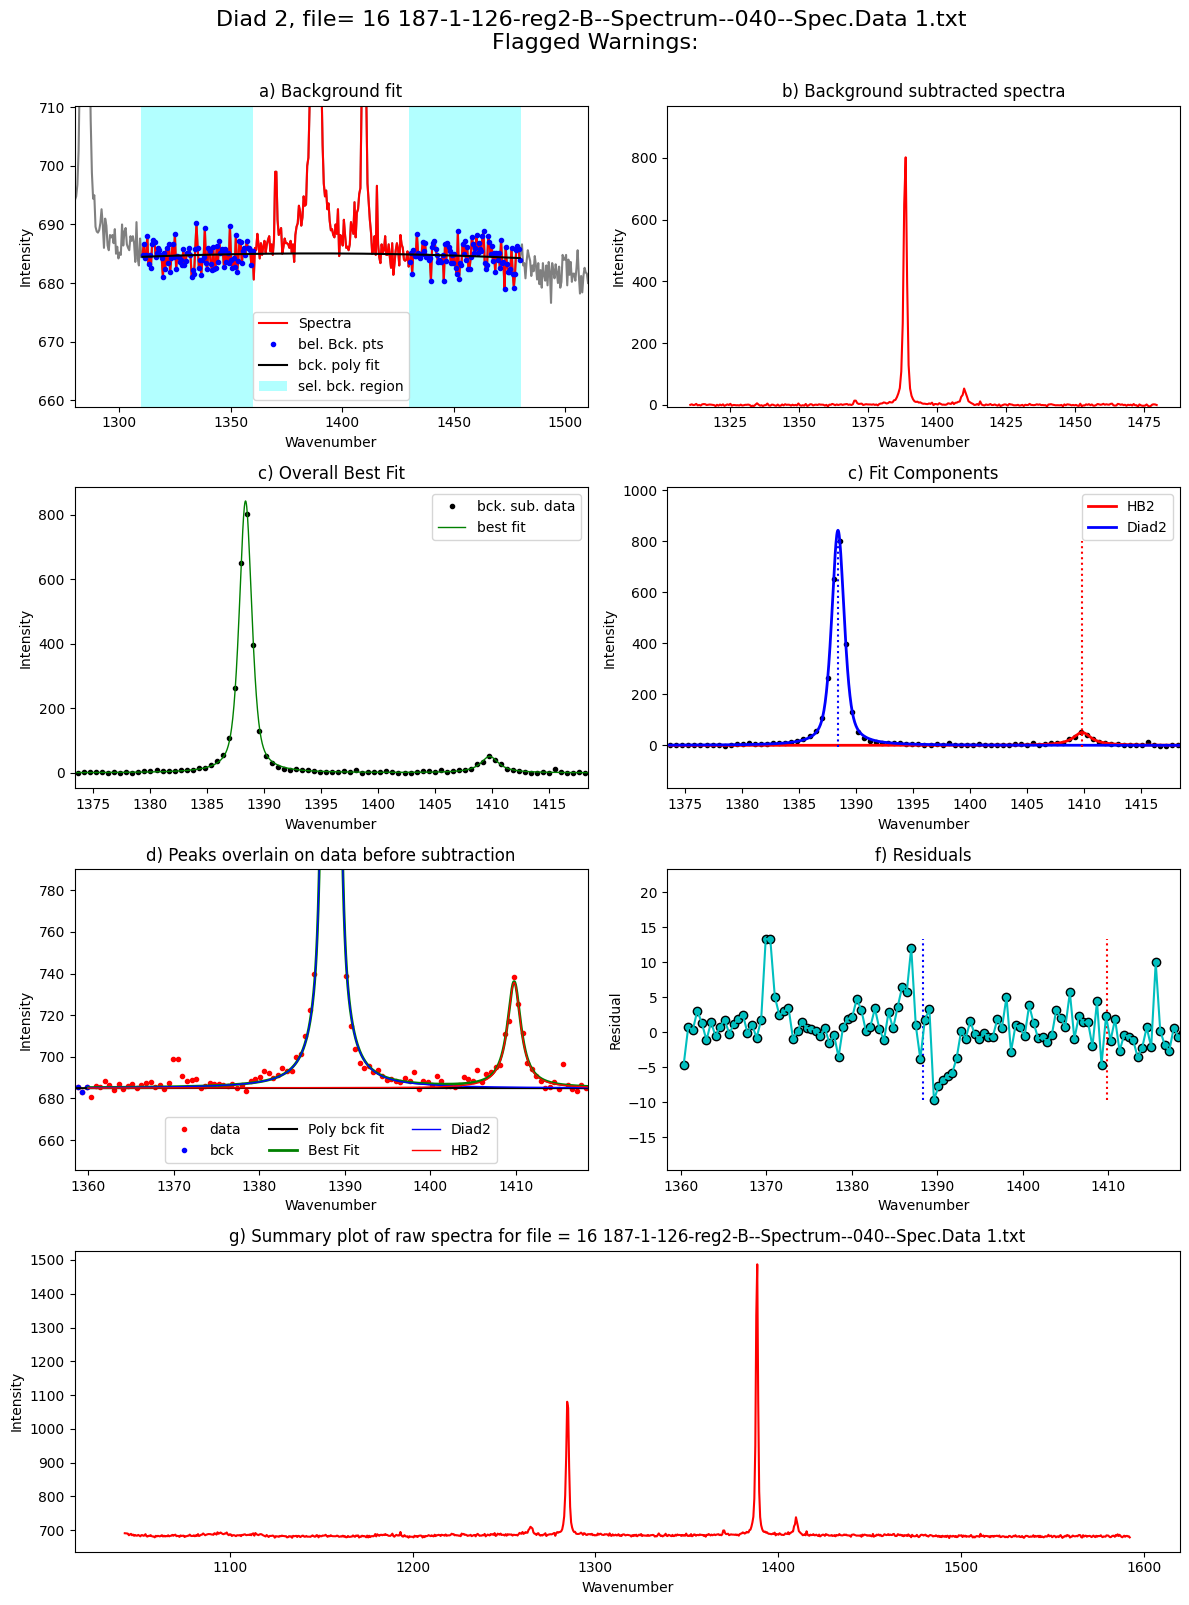

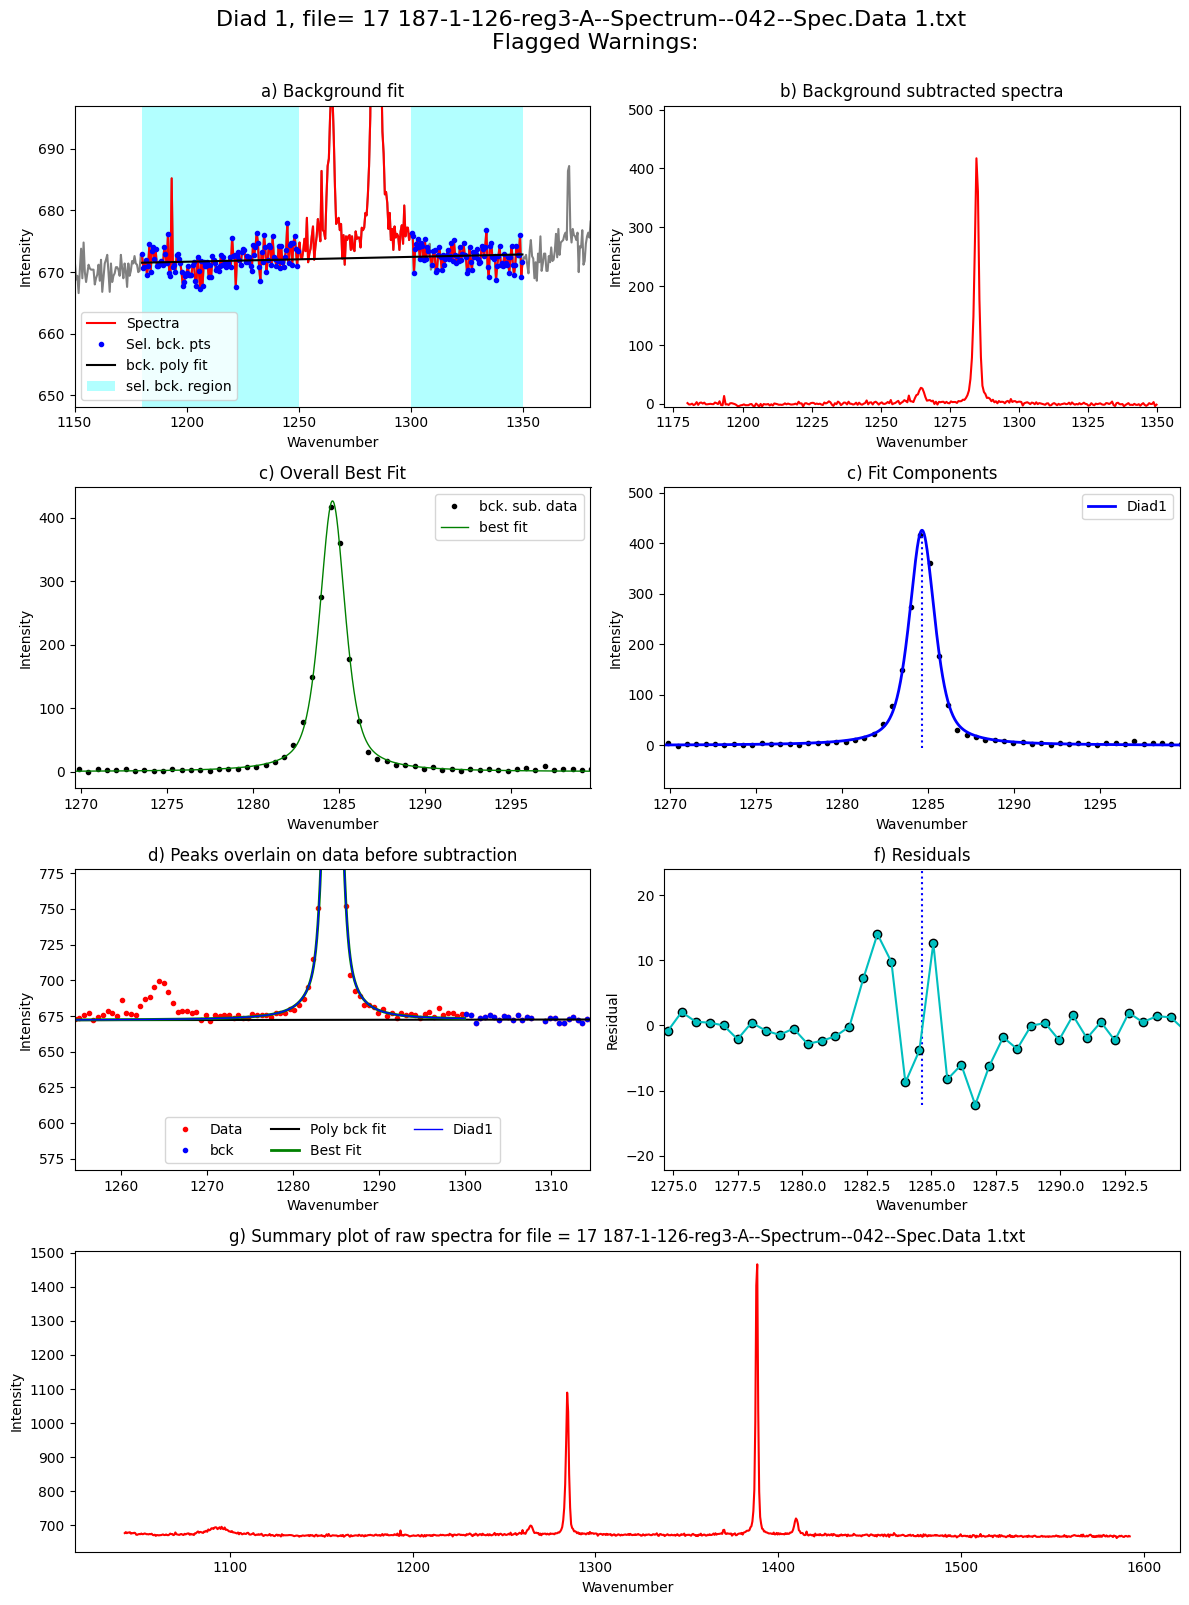

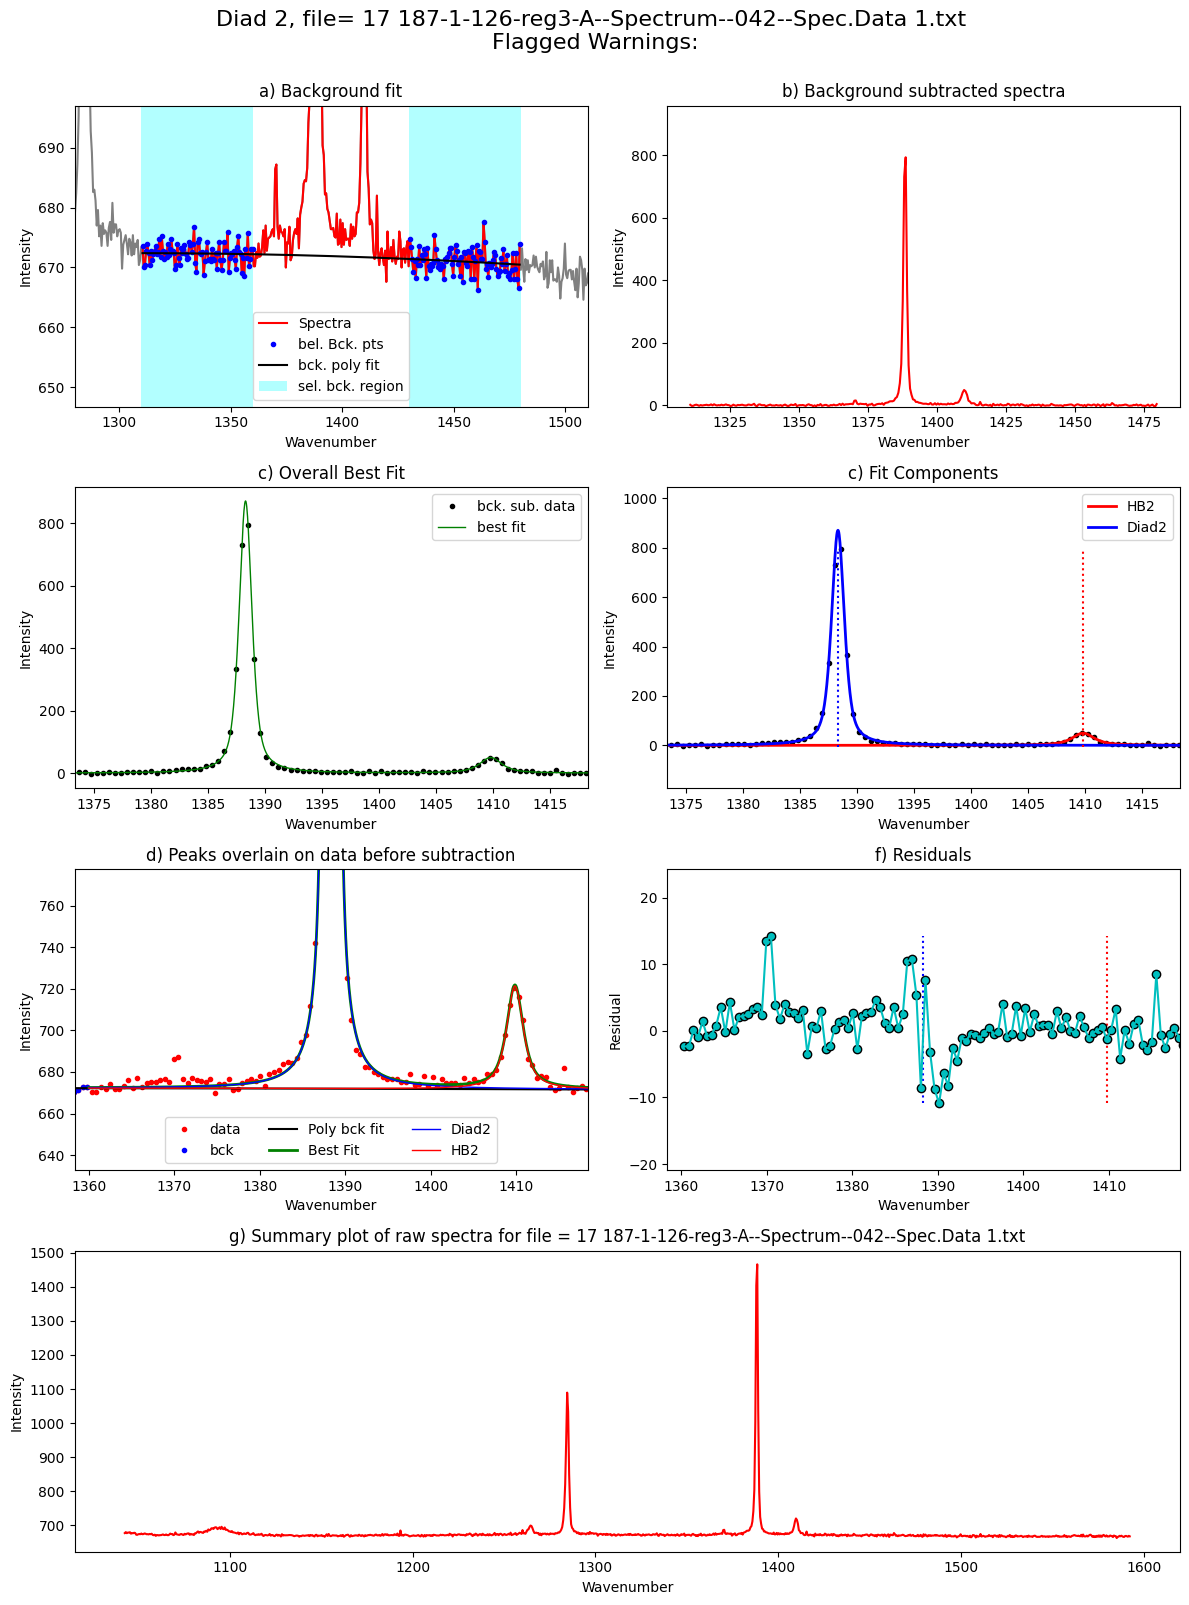

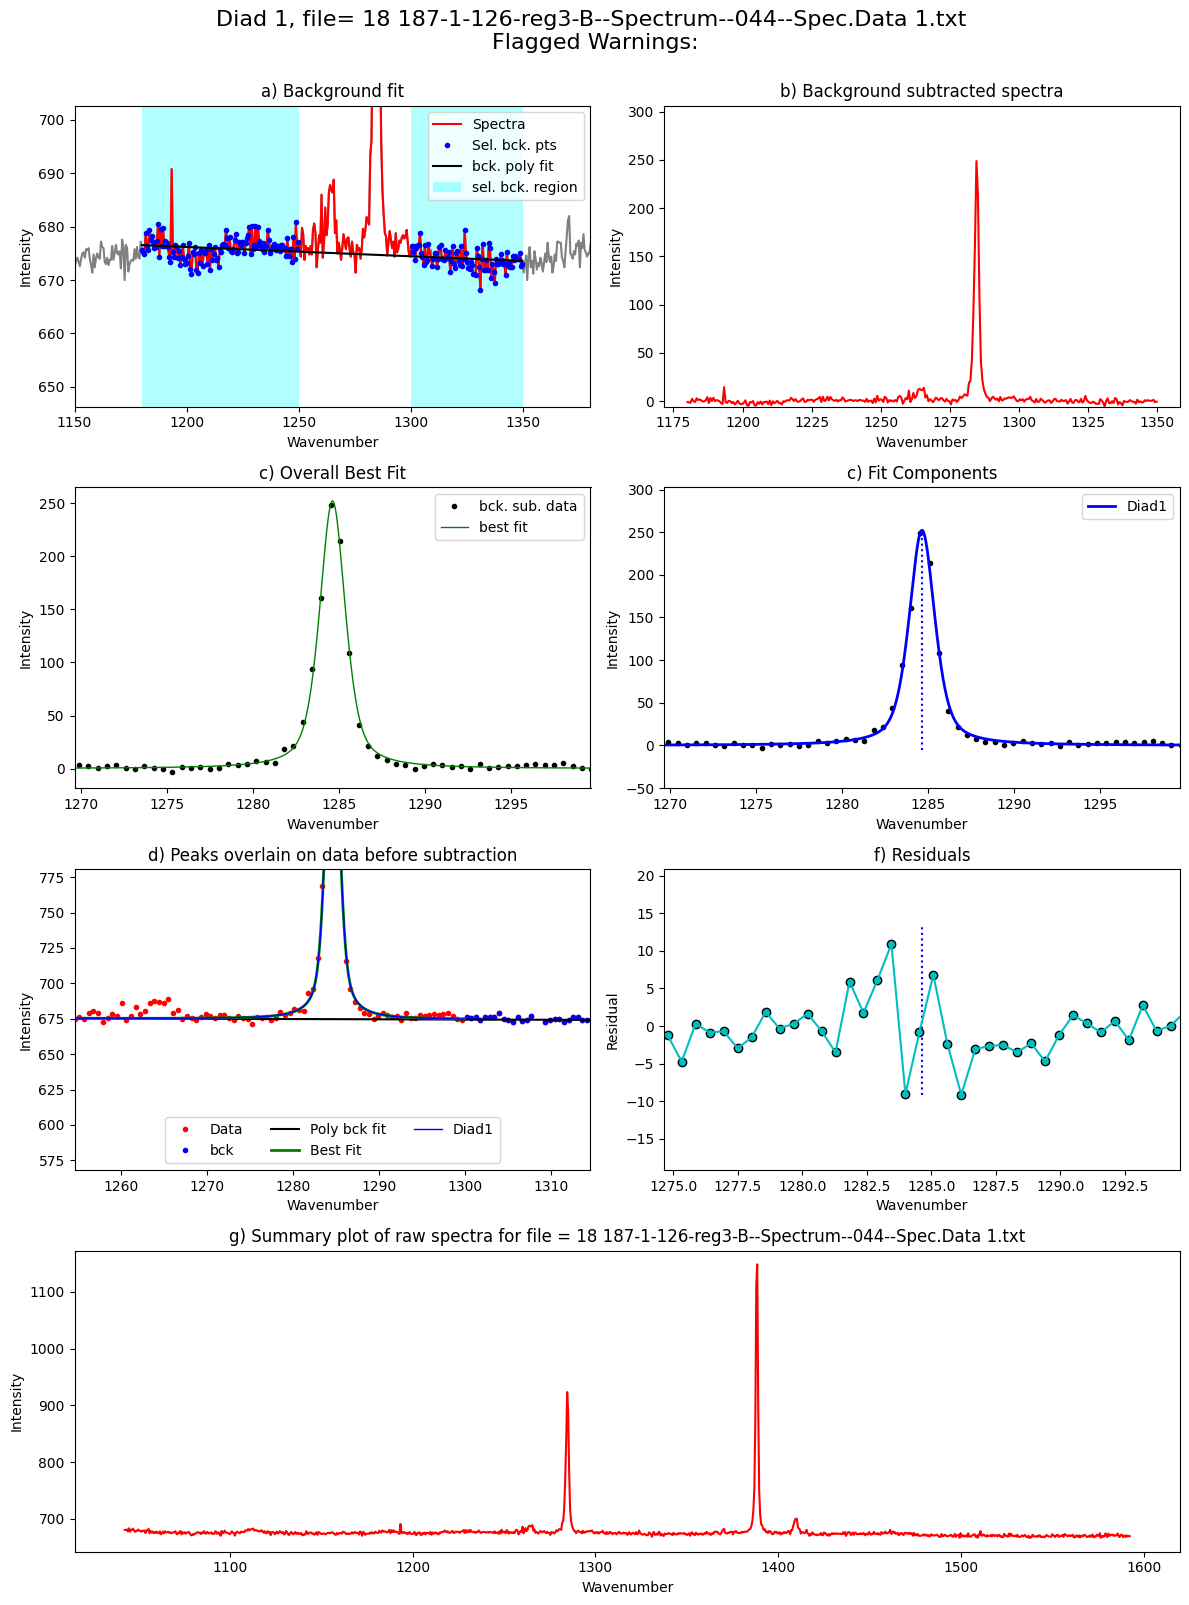

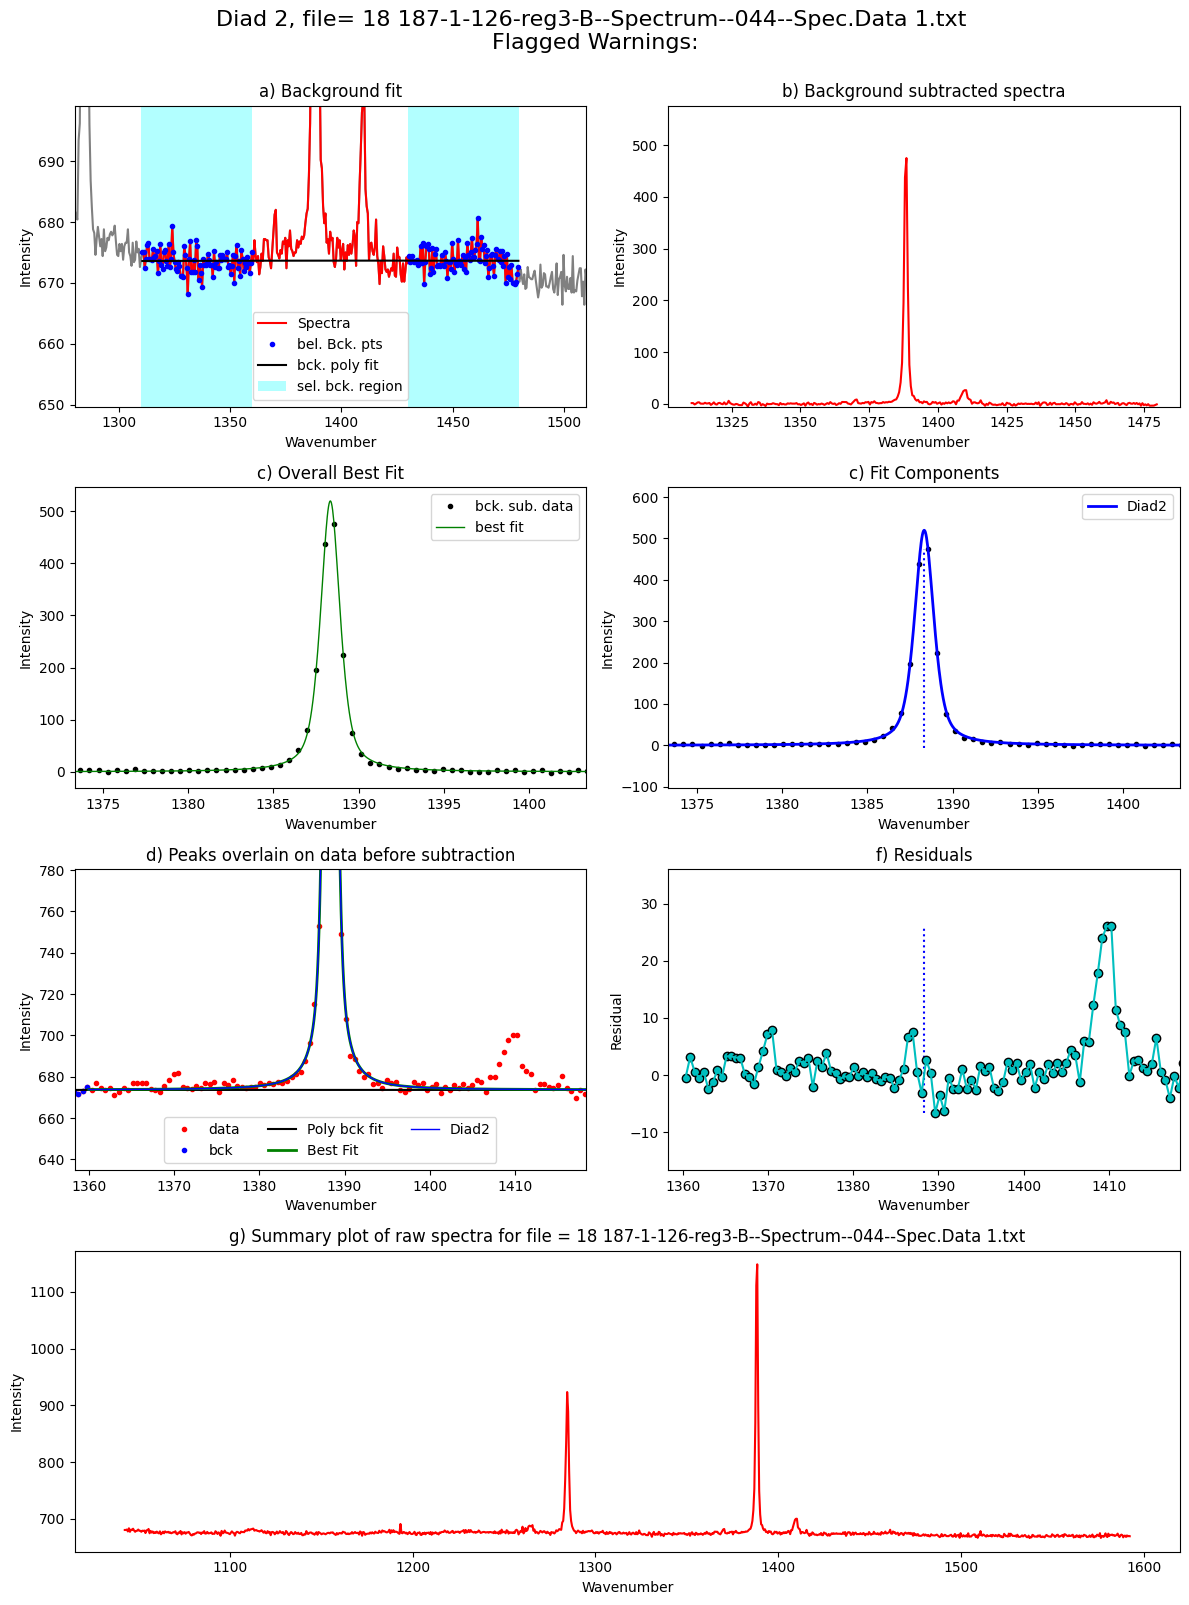

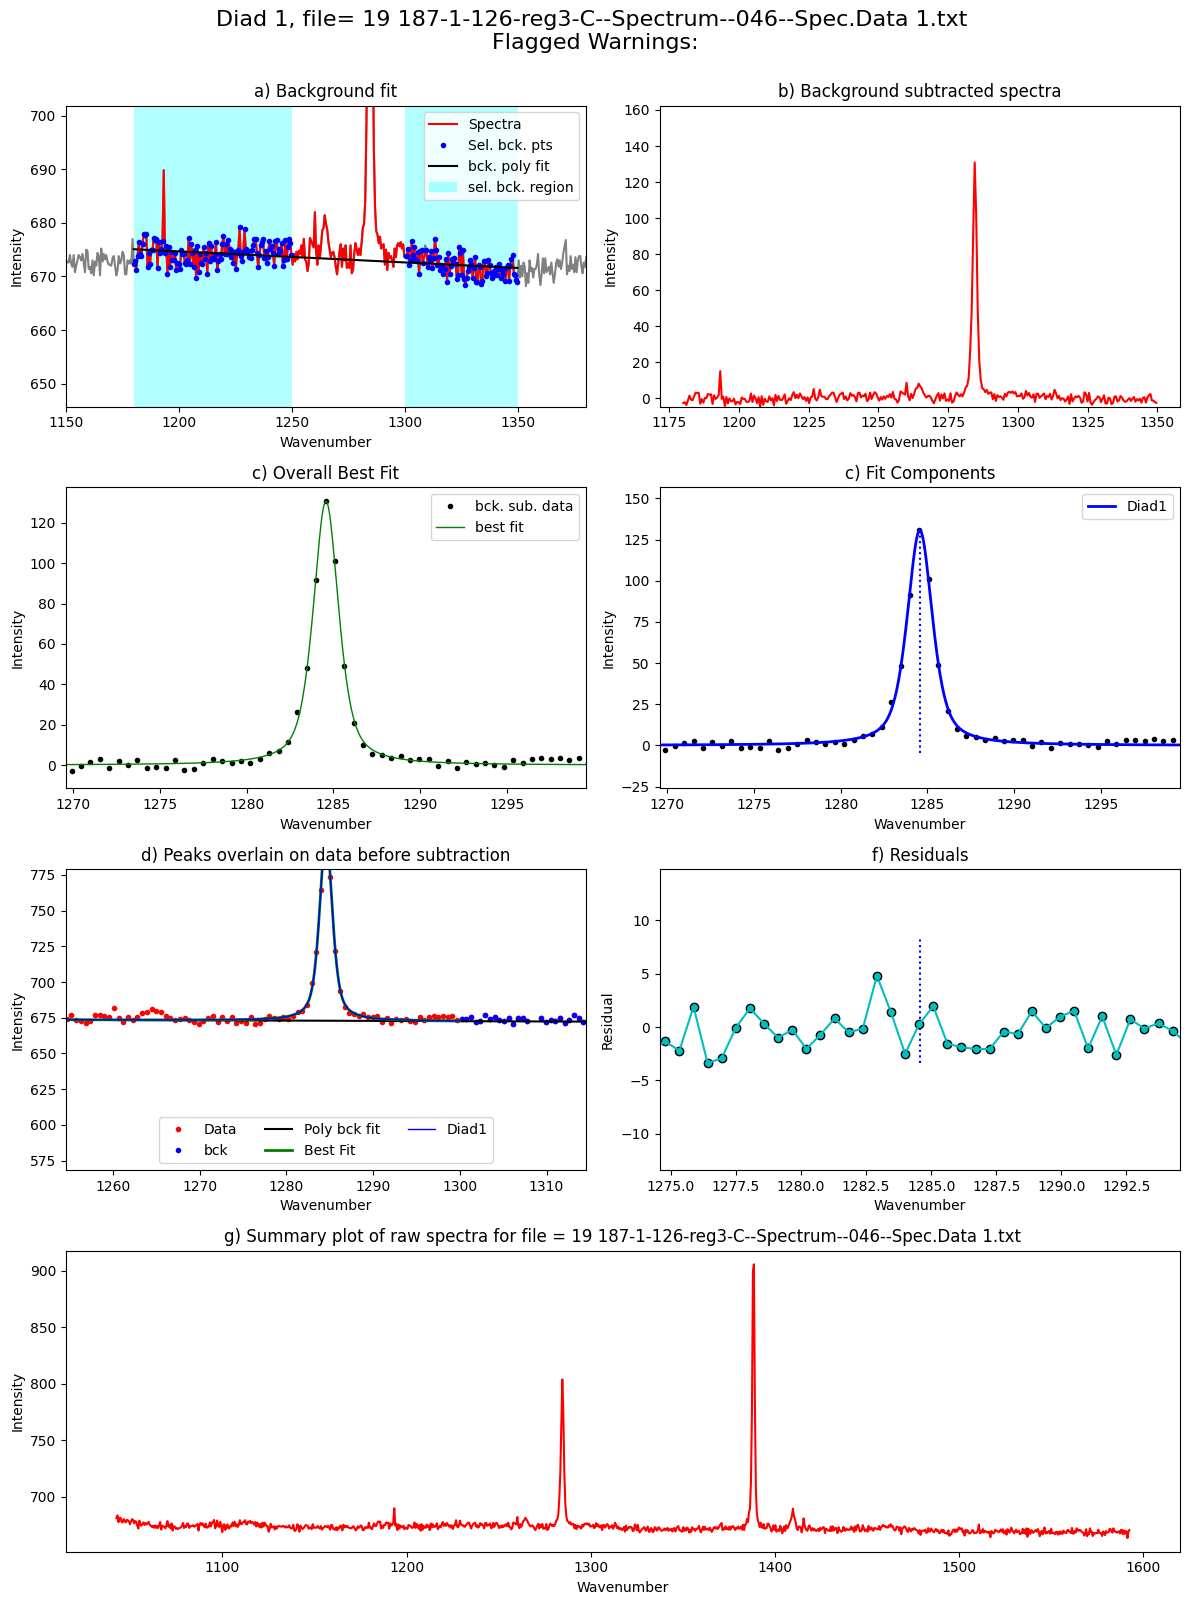

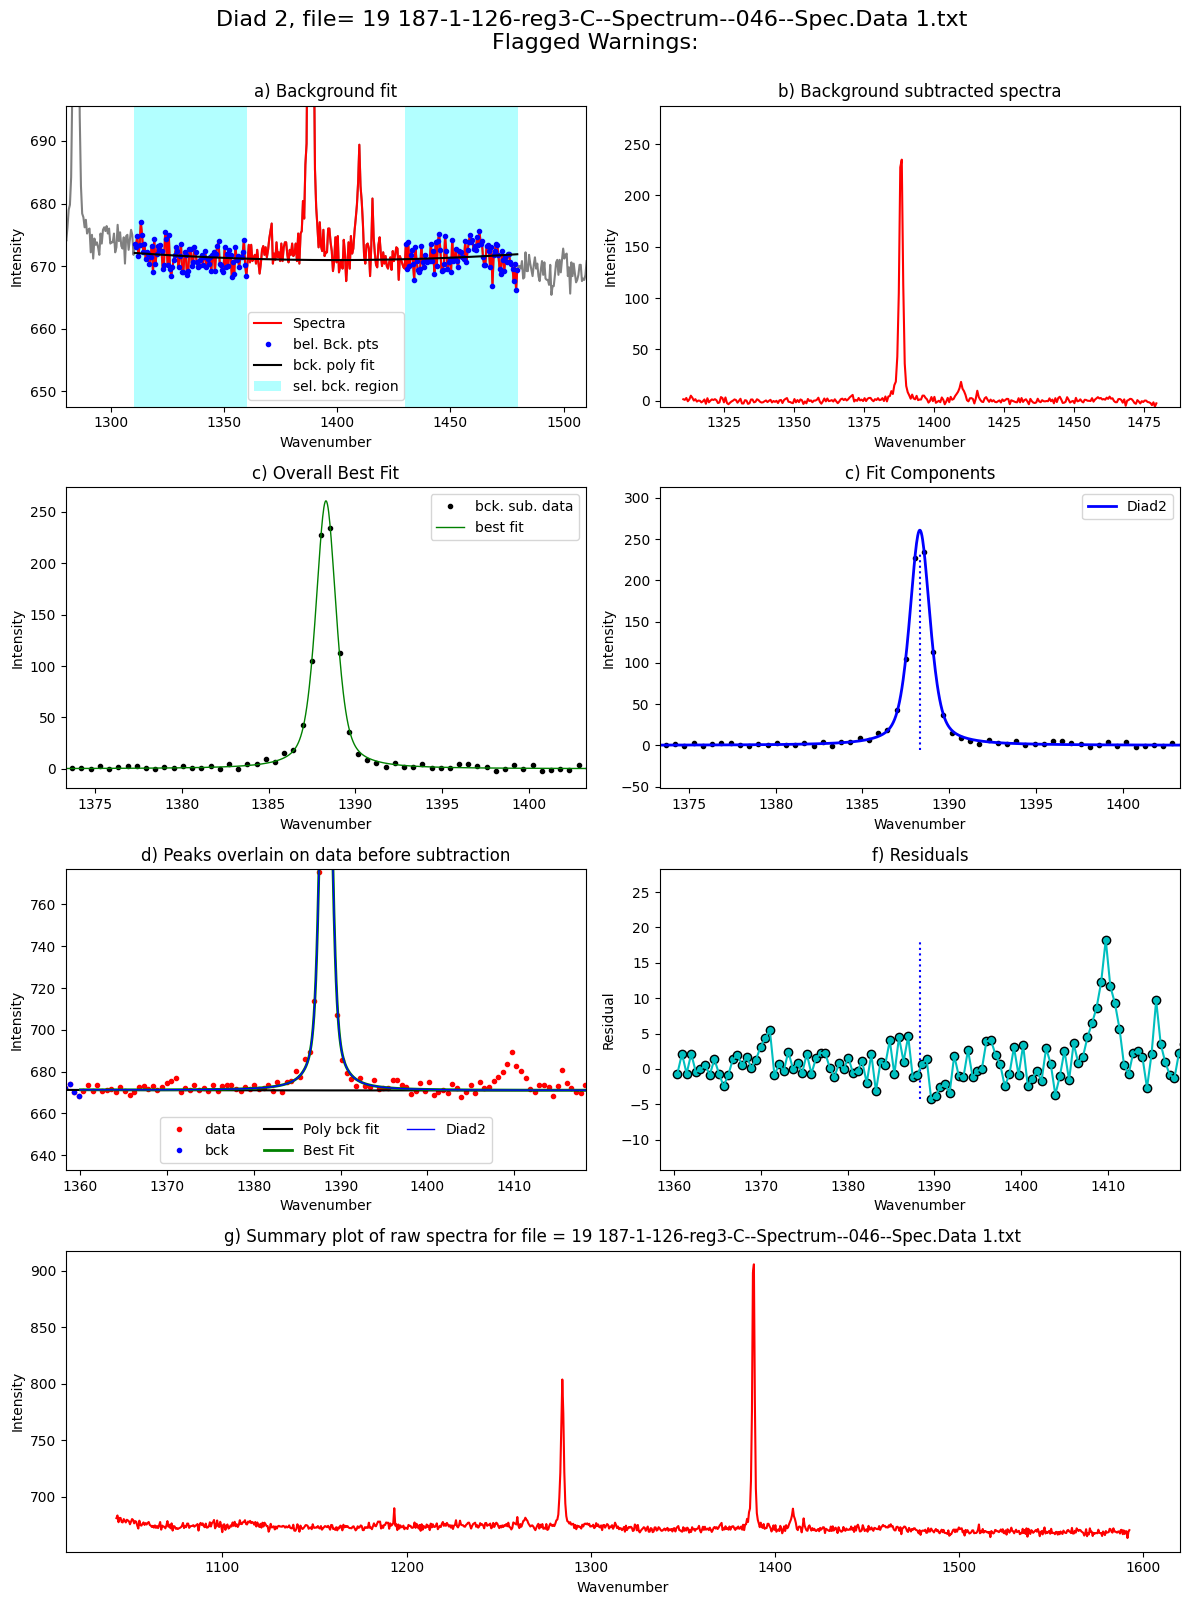

In [27]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [28]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [29]:
combo

filename   Splitting   Split_σ  \
0   187-1-125-reg1-A--Spectrum--012--Spec.Data 1_C...  104.375817  0.124400   
1        187-1-125-reg1-A--Spectrum--014--Spec.Data 1  104.402277  0.014587   
2   187-1-125-reg1-A--Spectrum--015--Spec.Data 1_C...  104.413692  0.013510   
3   187-1-125-reg1-B--Spectrum--017--Spec.Data 1_C...  104.210971  0.013739   
4        187-1-125-reg2-A--Spectrum--021--Spec.Data 1  104.264033  0.004284   
5        187-1-125-reg2-B--Spectrum--023--Spec.Data 1  104.275958  0.008236   
6        187-1-125-reg2-C--Spectrum--025--Spec.Data 1  104.165995  0.012632   
7        187-1-125-reg2-D--Spectrum--027--Spec.Data 1  104.190979  0.012653   
8        187-1-126-reg1-A--Spectrum--036--Spec.Data 1  103.534303  0.018842   
9        187-1-126-reg2-A--Spectrum--038--Spec.Data 1  103.611403  0.012794   
10       187-1-126-reg2-B--Spectrum--040--Spec.Data 1  103.645076  0.006873   
11       187-1-126-reg3-A--Spectrum--042--Spec.Data 1  103.684588  0.007651   
12       187-1-126-reg3-B--Spectrum--044--Spec.Data 1  103.690730  0.009799   
13       187-1-126-reg3-C--Spectrum--046--Spec.Data 1  103.744504  0.014300   

    Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0           1283.070695        0.119147              15.508638   
1           1283.061627        0.013007             160.901004   
2           1283.059676        0.011799             204.131845   
3           1283.497260        0.012094             150.088767   
4           1283.386583        0.003709             562.816325   
5           1283.327638        0.007888             522.361735   
6           1283.577822        0.011182             204.277467   
7           1283.481976        0.011219             189.793706   
8           1285.047937        0.017221             135.676002   
9           1284.825681        0.011381             179.073054   
10          1284.754331        0.006579             421.061780   
11          1284.643165        0.007400             426.180309   
12          1284.642190        0.008781             252.332597   
13          1284.565679        0.012846             130.698017   

    Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  \
0        1283.070695         39.078173           1.183582        1.492186   
1        1283.061627        480.413732           1.071783        2.140420   
2        1283.059676        626.400693           1.093155        2.702921   
3        1283.497260        450.154011           1.047606        1.913390   
4        1283.386633       1716.152071           1.128047        2.691922   
5        1283.327638       1565.201431           1.057319        5.694466   
6        1283.577822        643.715993           1.140029        2.713188   
7        1283.481976        563.710454           1.076714        2.726583   
8        1285.047937        282.457434           0.735636        2.837871   
9        1284.825681        404.381677           0.793895        2.618530   
10       1284.754331        970.860686           0.843379        3.763535   
11       1284.643165       1026.343412           0.878737        4.464918   
12       1284.642190        602.038760           0.888144        3.000051   
13       1284.565679        311.576957           0.869966        1.842190   

    ...  Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  \
0   ...      1.043243      1.051724                  0.102364   
1   ...      1.004673      1.091541                  0.010017   
2   ...      1.034215      1.088136                  0.074804   
3   ...      1.106780      1.084014                  0.223726   
4   ...      1.034901      1.071823                  0.078741   
5   ...      1.030596      1.005637                  0.064699   
6   ...      1.034328      1.049730                  0.078271   
7   ...      1.109121      1.131010                  0.234983   
8   ...      1.044084      1.095726                  0.064859   
9   ...      1.106430      1.116099                  0.168989 

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [30]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()